Ï£ºÏ†ú: ÏùòÎ£å Ïù∏ÌîÑÎùº Î∂ÑÌè¨Ïóê Í∏∞Î∞òÌïú ÏùòÎ£å Ï∑®ÏïΩÏßÄ ÌÉêÏÉâ Î∞è Í≥†Î†πÏù∏Íµ¨ ÏùòÎ£åÏ†ëÍ∑ºÏÑ± Ìñ•ÏÉÅÏùÑ ÏúÑÌïú ÏãúÍ∞ÅÌôî ÏûêÎ£å Íµ¨Ï∂ï
- Í≥†Î†πÏù∏Íµ¨ ÏùòÎ£åÏ†ëÍ∑ºÏÑ± Ìñ•ÏÉÅÏùÑ ÏúÑÌïú ÏùòÎ£å Ïù∏ÌîÑÎùº Î∂ÑÏÑù ÌîÑÎ†àÏûÑÏõåÌÅ¨ Î∞è ÏãúÍ∞ÅÌôî Í∏∞Î∞ò ÏùòÎ£åÏ∑®ÏïΩÏßÄ ÌÉêÏÉâ

1. API Î∂àÎü¨Ïò§Í∏∞
2. Î≥ëÏõêÎç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
3. ÏïΩÍµ≠Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
4. Ïù∏Íµ¨Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
5. Feature engineering
6. Î™®Îç∏ÎßÅ
7. ÏãúÍ∞ÅÌôî

ÏùòÎ£åÍ∏∞Í¥Ä ÌÅ¨Í∏∞ÎèÑ ÌôïÏù∏Ìï† Í≤É

In [1]:
import numpy as np
import pandas as pd
import re
import json
import requests
import time
import xml.etree.ElementTree as ET
import folium
import os
import zipfile
from sklearn.cluster import DBSCAN
#from geopy.distance
#import great_circle
from shapely.geometry import Point
import geopandas as gpd
import folium
import glob
import branca.colormap as cm
import random
from folium.features import GeoJsonTooltip, GeoJsonPopup
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from folium.plugins import MarkerCluster
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import geopandas as gpd
from matplotlib import colormaps
from scipy.spatial import cKDTree
from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
from matplotlib import font_manager, rc
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
font_path = "C:/Windows/Fonts/malgun.ttf"  # ÎòêÎäî ÏõêÌïòÎäî Ìè∞Ìä∏ Í≤ΩÎ°ú
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏Í∞Ä Íπ®ÏßÄÏßÄ ÏïäÎèÑÎ°ù ÏÑ§Ï†ï
plt.rcParams['axes.unicode_minus'] = False

## 1. API Î∂àÎü¨Ïò§Í∏∞_1Î≤àÎßå ÏûëÎèô

In [2]:
# Íµ≠Î¶ΩÏ§ëÏïôÏùòÎ£åÏõê_Ï†ÑÍµ≠ Î≥ë¬∑ÏùòÏõê Ï∞æÍ∏∞ ÏÑúÎπÑÏä§ Ïù∏Ï¶ùÌÇ§ Î∂àÎü¨Ïò§Í∏∞
url_H = 'http://apis.data.go.kr/B552657/HsptlAsembySearchService/getHsptlMdcncFullDown'
api_H = 'SOecclsdpfuvGmi+5d/vkz3M5XiRZEpLLLAm6oeRb4lI6TJSEsmP4nOvH6DfEznSzCw8o3+Ktedgq18jQIGUmg=='

# Íµ≠Î¶ΩÏ§ëÏïôÏùòÎ£åÏõê_Ï†ÑÍµ≠ ÏïΩÍµ≠ Ï†ïÎ≥¥ Ï°∞Ìöå ÏÑúÎπÑÏä§ Ïù∏Ï¶ùÌÇ§ Î∂àÎü¨Ïò§Í∏∞
url_M = "http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyFullDown"
api_M = 'SOecclsdpfuvGmi+5d/vkz3M5XiRZEpLLLAm6oeRb4lI6TJSEsmP4nOvH6DfEznSzCw8o3+Ktedgq18jQIGUmg=='

In [3]:
# APIÏóêÏÑú totalCountÎ•º ÏûêÎèôÏúºÎ°ú Í∞ÄÏ†∏ÏôÄ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏßë
def fetch_all_data(api_url, api_key, num_of_rows=100, delay=0.05):  # 50ms ÎåÄÍ∏∞

    # totalCount Í∞ÄÏ†∏Ïò§Í∏∞
    params = {
        'ServiceKey': api_key,
        'pageNo': '1',
        'numOfRows': '1'  # Ìïú Í∞úÎßå ÏöîÏ≤≠ÌïòÏó¨ totalCount ÌôïÏù∏
    }
    response = requests.get(api_url, params=params)
    
    if response.status_code == 200:
        root = ET.fromstring(response.content)
        total_count_elem = root.find(".//totalCount")
        total_count = int(total_count_elem.text) if total_count_elem is not None else 0
    else:
        print(f"totalCount Í∞ÄÏ†∏Ïò§Í∏∞ Ïã§Ìå®: ÏÉÅÌÉú ÏΩîÎìú {response.status_code}")
        return []
    
    all_responses = []
    total_pages = (total_count // num_of_rows) + (1 if total_count % num_of_rows else 0)

    for page in range(1, total_pages + 1):
        params = {
            'ServiceKey': api_key,
            'pageNo': str(page),
            'numOfRows': str(num_of_rows)
        }
        response = requests.get(api_url, params=params)

        if response.status_code == 200:
            all_responses.append(response.content)
        else:
            print(f"ÌéòÏù¥ÏßÄ {page} ÏöîÏ≤≠ Ïã§Ìå®: ÏÉÅÌÉú ÏΩîÎìú {response.status_code}")

        time.sleep(delay)  # 50ms ÎåÄÍ∏∞ (30TPS Ï†úÌïú ÎßûÏ∂îÍ∏∞)

    return all_responses

# fetch_all_data()Î°ú Í∞ÄÏ†∏Ïò® XML Îç∞Ïù¥ÌÑ∞Î•º DataFrameÏúºÎ°ú Î≥ÄÌôò
def convert_xml_to_dataframe(xml_data_list):
    
    parsed_data = []

    for xml_data in xml_data_list:
        root = ET.fromstring(xml_data)

        for item in root.findall(".//item"):
            data = {child.tag: child.text for child in item}
            parsed_data.append(data)

    return pd.DataFrame(parsed_data) if parsed_data else None

In [4]:
# fetach_all_data() Ï†ÅÏö©
response_H = fetch_all_data(url_H, api_H)
response_M = fetch_all_data(url_M, api_M)

# convert_xml_to_dataframe() Ï†ÅÏö©
df_H = convert_xml_to_dataframe(response_H)
df_M = convert_xml_to_dataframe(response_M)

# ÏóëÏÖÄ ÌååÏùºÎ°ú Ï∂îÏ∂ú
df_H.to_excel("C:/Users/lglg/OneDrive/Ï∫°Ïä§ÌÜ§/Î≥ëÏõê ÌíÄÎç∞Ïù¥ÌÑ∞.xlsx", index=False)
df_M.to_excel("C:/Users/lglg/OneDrive/Ï∫°Ïä§ÌÜ§/ÏïΩÍµ≠ ÌíÄÎç∞Ïù¥ÌÑ∞.xlsx", index=False)

## 2. Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [3]:
# Î≥ëÏõê ÌíÄÎç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
hos = pd.read_excel("C:/Users/lglg/OneDrive/Ï∫°Ïä§ÌÜ§/Î≥ëÏõê ÌíÄÎç∞Ïù¥ÌÑ∞.xlsx")
#hos = pd.read_excel("C:/Users/Admin/OneDrive/Ï∫°Ïä§ÌÜ§/Î≥ëÏõê ÌíÄÎç∞Ïù¥ÌÑ∞.xlsx")

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌòïÌÉúÎ°ú Î≥ÄÍ≤Ω
hos_df = pd.DataFrame(hos)
print(hos_df.shape)

(77707, 34)


In [4]:
# Î≥ëÏõê ÌíÄÎç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌïÑÏöî ÏóÜÎäî Î≥ÄÏàòÏ†úÍ±∞
drop_cols = ['dutyEmcls', 'dutyEmclsName', 'dutyEryn', 'dutyInf', 'dutyMapimg',
             'dutyTel1', 'dutyTime1c', 'dutyTime1s', 'dutyTime2c',
             'dutyTime2s', 'dutyTime3c', 'dutyTime3s', 'dutyTime4c', 'dutyTime4s',
             'dutyTime5c', 'dutyTime5s', 'hpid', 'postCdn1', 'postCdn2',
             'rnum', 'dutyTime6c', 'dutyTime6s', 'dutyTime7c', 'dutyTime7s',
             'dutyTime8c', 'dutyTime8s', 'dutyEtc', 'dutyTel3']

# ÌïÑÏöîÌïú Ïª¨ÎüºÎßå Ï∂îÎ†§ÏÑú ÏÇ≠Ï†ú
drop_cols_exist = [col for col in drop_cols if col in hos_df.columns]
hos_df = hos_df.drop(columns=drop_cols_exist)

# Í∞Å Î≥ÄÏàò Í≤∞Ï∏°Í∞í Í∞úÏàò ÌôïÏù∏
print(hos_df.isnull().sum())

dutyAddr      0
dutyDiv       0
dutyDivNam    0
dutyName      0
wgs84Lat      0
wgs84Lon      0
dtype: int64


In [5]:
# 'dutyAddr' Ïó¥Ïùò Ïù¥Î¶ÑÏùÑ 'Jibun'ÏúºÎ°ú Î≥ÄÍ≤Ω
hos_df.rename(columns={'dutyAddr': 'Jibun'}, inplace=True)

In [6]:
# 3Ï∞® Î≥ëÏõê Î¶¨Ïä§Ìä∏: 23ÎÖÑ Í∏∞Ï§Ä 45Í∞ú
third_level_hospitals = [
    'Í∞ïÎ∂ÅÏÇºÏÑ±Î≥ëÏõê','Í≥†Î†§ÎåÄÌïôÍµêÏùòÍ≥ºÎåÄÌïôÎ∂ÄÏÜçÍµ¨Î°úÎ≥ëÏõê','Ïó∞ÏÑ∏ÎåÄÌïôÍµêÏùòÍ≥ºÎåÄÌïôÍ∞ïÎÇ®ÏÑ∏Î∏åÎûÄÏä§Î≥ëÏõê',
    'Ïù¥ÌôîÏó¨ÏûêÎåÄÌïôÍµêÏùòÍ≥ºÎåÄÌïôÎ∂ÄÏÜçÎ™©ÎèôÎ≥ëÏõê','Ï§ëÏïôÎåÄÌïôÍµêÎ≥ëÏõê','ÌïôÍµêÎ≤ïÏù∏Í∞ÄÌÜ®Î¶≠ÌïôÏõêÍ∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµêÏÑúÏö∏ÏÑ±Î™®Î≥ëÏõê',
    'Í±¥Íµ≠ÎåÄÌïôÍµêÎ≥ëÏõê','ÏÇºÏÑ±ÏÑúÏö∏Î≥ëÏõê','Ïó∞ÏÑ∏ÎåÄÌïôÍµêÏùòÍ≥ºÎåÄÌïôÏÑ∏Î∏åÎûÄÏä§Î≥ëÏõê','Ïû¨Îã®Î≤ïÏù∏ÏïÑÏÇ∞ÏÇ¨ÌöåÎ≥µÏßÄÏû¨Îã®ÏÑúÏö∏ÏïÑÏÇ∞Î≥ëÏõê',
    'ÌïôÍµêÎ≤ïÏù∏Í≥†Î†§Ï§ëÏïôÌïôÏõêÍ≥†Î†§ÎåÄÌïôÍµêÏùòÍ≥ºÎåÄÌïôÎ∂ÄÏÜçÎ≥ëÏõê(ÏïàÏïîÎ≥ëÏõê)','ÌïúÏñëÎåÄÌïôÍµêÎ≥ëÏõê','Í≤ΩÌù¨ÎåÄÌïôÍµêÎ≥ëÏõê',
    'ÏÑúÏö∏ÎåÄÌïôÍµêÎ≥ëÏõê','Í∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµê Ïù∏Ï≤úÏÑ±Î™®Î≥ëÏõê','ÏàúÏ≤úÌñ•ÎåÄÌïôÍµêÎ∂ÄÏÜçÎ∂ÄÏ≤úÎ≥ëÏõê','ÏùòÎ£åÎ≤ïÏù∏ Í∏∏ÏùòÎ£åÏû¨Îã® Í∏∏Î≥ëÏõê',
    'Ïù∏ÌïòÎåÄÌïôÍµêÏùòÍ≥ºÎåÄÌïôÎ∂ÄÏÜçÎ≥ëÏõê','Í≥†Î†§ÎåÄÌïôÍµêÏùòÍ≥ºÎåÄÌïôÎ∂ÄÏÜçÏïàÏÇ∞Î≥ëÏõê','Î∂ÑÎãπÏÑúÏö∏ÎåÄÌïôÍµêÎ≥ëÏõê',
    'ÏïÑÏ£ºÎåÄÌïôÍµêÎ≥ëÏõê','ÌïúÎ¶ºÎåÄÌïôÍµêÏÑ±Ïã¨Î≥ëÏõê','Í∞ïÎ¶âÏïÑÏÇ∞Î≥ëÏõê','Ïó∞ÏÑ∏ÎåÄÌïôÍµêÏõêÏ£ºÏÑ∏Î∏åÎûÄÏä§Í∏∞ÎèÖÎ≥ëÏõê',
    'Ï∂©Î∂ÅÎåÄÌïôÍµêÎ≥ëÏõê','Îã®Íµ≠ÎåÄÌïôÍµêÏùòÍ≥ºÎåÄÌïôÎ∂ÄÏÜçÎ≥ëÏõê','Ï∂©ÎÇ®ÎåÄÌïôÍµêÎ≥ëÏõê','ÏõêÍ¥ëÎåÄÌïôÍµêÎ≥ëÏõê',
    'Ï†ÑÎ∂ÅÎåÄÌïôÍµêÎ≥ëÏõê','Ï†ÑÎÇ®ÎåÄÌïôÍµêÎ≥ëÏõê','Ï°∞ÏÑ†ÎåÄÌïôÍµêÎ≥ëÏõê','ÌôîÏàúÏ†ÑÎÇ®ÎåÄÌïôÍµêÎ≥ëÏõê','Í≤ΩÎ∂ÅÎåÄÌïôÍµêÎ≥ëÏõê',
    'Í≥ÑÎ™ÖÎåÄÌïôÍµêÎèôÏÇ∞Î≥ëÏõê','ÎåÄÍµ¨Í∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµêÎ≥ëÏõê','ÏòÅÎÇ®ÎåÄÌïôÍµêÎ≥ëÏõê','Ïπ†Í≥°Í≤ΩÎ∂ÅÎåÄÌïôÍµêÎ≥ëÏõê',
    'ÎèôÏïÑÎåÄÌïôÍµêÎ≥ëÏõê','Î∂ÄÏÇ∞ÎåÄÌïôÍµêÎ≥ëÏõê','ÏñëÏÇ∞Î∂ÄÏÇ∞ÎåÄÌïôÍµêÎ≥ëÏõê','Ïù∏Ï†úÎåÄÌïôÍµêÎ∂ÄÏÇ∞Î∞±Î≥ëÏõê',
    'ÌïôÍµêÎ≤ïÏù∏Ïö∏ÏÇ∞Í≥µÏóÖÌïôÏõêÏö∏ÏÇ∞ÎåÄÌïôÍµêÎ≥ëÏõê','Í≤ΩÏÉÅÍµ≠Î¶ΩÎåÄÌïôÍµêÎ≥ëÏõê','ÌïôÍµêÎ≤ïÏù∏ÏÑ±Í∑†Í¥ÄÎåÄÌïôÏÇºÏÑ±Ï∞ΩÏõêÎ≥ëÏõê','ÌïôÍµêÎ≤ïÏù∏Ïó∞ÏÑ∏ÎåÄÌïôÍµêÏùòÍ≥ºÎåÄÌïôÏÑ∏Î∏åÎûÄÏä§Î≥ëÏõê'
]

# 1Ï∞®¬∑2Ï∞®¬∑Í∏∞ÌÉÄ Î≥ëÏõê Î∂ÑÎ•ò Í∏∞Ï§Ä
hospital_level_map = {
    'ÏùòÏõê': 1,
    'ÌïúÏùòÏõê': 1,
    'ÏπòÍ≥ºÏùòÏõê': 1,
    'Î≥¥Í±¥ÏÜå': 1,

    'Î≥ëÏõê': 2,
    'Ï¢ÖÌï©Î≥ëÏõê': 2,
    'ÏöîÏñëÎ≥ëÏõê': 2,
    'ÌïúÎ∞©Î≥ëÏõê': 2,
    'ÏπòÍ≥ºÎ≥ëÏõê': 2,

    'Í∏∞ÌÉÄ': 0,
    'Í∏∞ÌÉÄ(Íµ¨Í∏âÏ∞®)': 0
}

# Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Í∏∞Í¥ÄÏ¢ÖÎ≥ÑÏóê Îî∞Îùº Íµ¨Î∂Ñ
hos_df['ÏùòÎ£åÍ∏∞Í¥ÄÍµ¨Î∂Ñ'] = hos_df['dutyDivNam'].map(hospital_level_map)

# dutyNameÏù¥ 3Ï∞® Î≥ëÏõê Î™©Î°ùÏóê Ìè¨Ìï®ÎêòÎ©¥ Î¨¥Ï°∞Í±¥ '3Ï∞®'Î°ú Ïû¨ÏßÄÏ†ï
hos_df.loc[hos_df['dutyName'].isin(third_level_hospitals), 'ÏùòÎ£åÍ∏∞Í¥ÄÍµ¨Î∂Ñ'] = 3

# Í≤∞Í≥º ÌôïÏù∏
print(hos_df['ÏùòÎ£åÍ∏∞Í¥ÄÍµ¨Î∂Ñ'].value_counts())
#0: Í∏∞ÌÉÄ, 1: 1Ï∞®, 2: 2Ï∞®, 3: 3Ï∞®

1    73538
2     3961
0      164
3       44
Name: ÏùòÎ£åÍ∏∞Í¥ÄÍµ¨Î∂Ñ, dtype: int64


In [7]:
missing_3rd = [name for name in third_level_hospitals if name not in hos_df['dutyName'].unique()]
print(f"ÎàÑÎùΩÎêú 3Ï∞® Î≥ëÏõê Ïàò: {len(missing_3rd)}")
print("ÎàÑÎùΩÎêú Î≥ëÏõê Î™©Î°ù:")
print(missing_3rd)

ÎàÑÎùΩÎêú 3Ï∞® Î≥ëÏõê Ïàò: 1
ÎàÑÎùΩÎêú Î≥ëÏõê Î™©Î°ù:
['ÌïôÍµêÎ≤ïÏù∏Ïó∞ÏÑ∏ÎåÄÌïôÍµêÏùòÍ≥ºÎåÄÌïôÏÑ∏Î∏åÎûÄÏä§Î≥ëÏõê']


In [8]:
# ÌÉÄÍ≤ü Î≥ëÏõê ÌÇ§ÏõåÎìú
target_keywords = ['ÏùòÍ≥ºÎåÄÌïôÏÑ∏Î∏åÎûÄÏä§']

# ÌïÑÌÑ∞ÎßÅ
filtered_df = hos_df[
    (hos_df['dutyName'].apply(lambda x: any(keyword in x for keyword in target_keywords)))]

# Í≤∞Í≥º ÌôïÏù∏
print(filtered_df[['dutyName']])

              dutyName
31111  Ïó∞ÏÑ∏ÎåÄÌïôÍµêÏùòÍ≥ºÎåÄÌïôÏÑ∏Î∏åÎûÄÏä§Î≥ëÏõê


'ÌïôÍµêÎ≤ïÏù∏Ïó∞ÏÑ∏ÎåÄÌïôÍµêÏùòÍ≥ºÎåÄÌïôÏÑ∏Î∏åÎûÄÏä§Î≥ëÏõê'ÏùÄ Îç∞Ïù¥ÌÑ∞Ïóê ÏóÜÍ∏∞Ïóê 3Ï∞® Î≥ëÏõêÏóêÏÑú Ï†úÏô∏(45Í∞ú Ï§ë 44Í∞úÏùò 3Ï∞® Í∏∞Í¥ÄÎßå ÏÇ¨Ïö©)

### ÏãúÎèÑ Îß§Ìïë

In [9]:
# hos_df Î≥µÏÇ¨
hos_df_sido = hos_df.copy()

# ÏãúÎèÑ Îß§Ìïë ÎîïÏÖîÎÑàÎ¶¨
sido_mapping = {
    'ÏÑúÏö∏': 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 'Î∂ÄÏÇ∞': 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'ÎåÄÍµ¨': 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú',
    'Ïù∏Ï≤ú': 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú', 'Í¥ëÏ£º': 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú', 'ÎåÄÏ†Ñ': 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú',
    'Ïö∏ÏÇ∞': 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú', 'ÏÑ∏Ï¢Ö': 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú', 'Í≤ΩÍ∏∞': 'Í≤ΩÍ∏∞ÎèÑ',
    'Í∞ïÏõê': 'Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ', 'Ï∂©Î∂Å': 'Ï∂©Ï≤≠Î∂ÅÎèÑ', 'Ï∂©ÎÇ®': 'Ï∂©Ï≤≠ÎÇ®ÎèÑ',
    'Ï†ÑÎ∂Å': 'Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ', 'Ï†ÑÎÇ®': 'Ï†ÑÎùºÎÇ®ÎèÑ', 'Í≤ΩÎ∂Å': 'Í≤ΩÏÉÅÎ∂ÅÎèÑ',
    'Í≤ΩÎÇ®': 'Í≤ΩÏÉÅÎÇ®ÎèÑ', 'Ï†úÏ£º': 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ', 'Ï†ÑÎùºÎ∂ÅÎèÑ': 'Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ'
}

# ÏãúÎèÑ Ï∂îÏ∂ú ÏÇ¨Ïö©Ïûê Ï†ïÏùò Ìï®Ïàò ÏÉùÏÑ±
def extract_sido(addr):
    if pd.isnull(addr):
        return None

    # Ï†ÑÏ≤¥ ÏãúÎèÑÎ™Ö(ÌíÄÎÑ§ÏûÑ)ÏùÑ Î®ºÏ†Ä ÌôïÏù∏
    for full_sido in sido_mapping.values():
        if addr.startswith(full_sido):
            return full_sido

    # ÏãúÎèÑ ÏïΩÏñ¥ Îß§Ìïë
    for short, full in sido_mapping.items():
        if addr.startswith(short):
            return full

    return None  # Îß§Ïπ≠ÎêòÏßÄ ÏïäÎäî Í≤ΩÏö∞

# ÏúÑÏπò Ï†ïÏùò Ìï®Ïàò ÏÉùÏÑ±
def move_column_after(df, target_col, after_col):

    cols = df.columns.tolist()

    if target_col not in cols or after_col not in cols:
        raise ValueError(f"'{target_col}' ÎòêÎäî '{after_col}' Ïª¨ÎüºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")

    cols.remove(target_col)
    idx = cols.index(after_col)
    cols.insert(idx + 1, target_col)
    return df[cols]

# 'Jibun'ÏóêÏÑú 'Sido' Ï∂îÏ∂ú
hos_df_sido['Sido'] = hos_df_sido['Jibun'].apply(extract_sido)

# 'Sido'Î•º 'Jibun' Îã§ÏùåÏúºÎ°ú Ïù¥Îèô
hos_df_sido = move_column_after(hos_df_sido, 'Sido', 'Jibun')

# Í∞Å Î≥ÄÏàò Í≤∞Ï∏°Í∞í Í∞úÏàò ÌôïÏù∏
print(hos_df_sido.isnull().sum())

Jibun         0
Sido          0
dutyDiv       0
dutyDivNam    0
dutyName      0
wgs84Lat      0
wgs84Lon      0
ÏùòÎ£åÍ∏∞Í¥ÄÍµ¨Î∂Ñ        0
dtype: int64


In [10]:
sido_list = hos_df_sido['Sido'].dropna().unique().tolist()
print(sorted(sido_list))

['Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ', 'Í≤ΩÍ∏∞ÎèÑ', 'Í≤ΩÏÉÅÎÇ®ÎèÑ', 'Í≤ΩÏÉÅÎ∂ÅÎèÑ', 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú', 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú', 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú', 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú', 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú', 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú', 'Ï†ÑÎùºÎÇ®ÎèÑ', 'Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ', 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ', 'Ï∂©Ï≤≠ÎÇ®ÎèÑ', 'Ï∂©Ï≤≠Î∂ÅÎèÑ']


### ÏãúÍµ∞Íµ¨ Îß§Ìïë

In [11]:
# Ï†ÑÍµ≠ Î≤ïÏ†ïÎèô ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
all_df = pd.read_csv("C:/Users/lglg/OneDrive/Ï∫°Ïä§ÌÜ§/Íµ≠ÌÜ†ÍµêÌÜµÎ∂Ä_Ï†ÑÍµ≠ Î≤ïÏ†ïÎèô_20250415.csv",encoding='utf-8')
sigungu_list = all_df['ÏãúÍµ∞Íµ¨Î™Ö'].dropna().unique().tolist()

# ÏãúÍµ∞Íµ¨ Ï∂îÏ∂ú Ìï®Ïàò Ï†ïÏùò
def extract_sigungu(addr, sigungu_list):
    if pd.isnull(addr):
        return None
    words = re.findall(r'\w+', addr)  # Îã®Ïñ¥ Îã®ÏúÑ Ï∂îÏ∂ú
    for word in words:
        word = re.sub(r'[^\wÍ∞Ä-Ìû£]', '', word)  # ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
        if word in sigungu_list:
            return word
    return None

# hos_df_sido Î≥µÏÇ¨
hos_df_sigungu = hos_df_sido.copy()

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú 'Jibun' Ïó¥ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏãúÍµ∞Íµ¨ Ï∂îÏ∂ú
hos_df_sigungu['Sigungu'] = hos_df_sigungu['Jibun'].apply(lambda x: extract_sigungu(x, sigungu_list))

# 'Sigungu'Î•º 'Sido' Îã§ÏùåÏúºÎ°ú Ïù¥Îèô
hos_df_sigungu = move_column_after(hos_df_sigungu, 'Sigungu', 'Sido')

# 'Sigungu'Í∞Ä Í≤∞Ï∏°Ïù¥Í≥† 'Sido'Í∞Ä 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú'Ïù∏ ÌñâÎßå ÏÑ†ÌÉùÌïòÏó¨ Î≥¥ÏôÑ
mask = (hos_df_sigungu['Sigungu'].isnull()) & (hos_df_sigungu['Sido'] == 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú')
hos_df_sigungu.loc[mask, 'Sigungu'] = 'ÏÑ∏Ï¢ÖÏãú'

# Í≤∞Í≥º ÌôïÏù∏
print(hos_df_sigungu['Sigungu'].isnull().sum())

8


In [12]:
# Î≥ëÏõê Îç∞Ïù¥ÌÑ∞Ïùò Í≤∞Ï∏°Í∞í ÌôïÏù∏Ìï¥Î≥¥Í∏∞
a = hos_df_sigungu[hos_df_sigungu['Sigungu'].isnull()]
print(a['Jibun'].head(10))

16777               Í≤ΩÍ∏∞ÎèÑ Í∏àÎπõÎ°ú 24-22 (ÍµøÎã•ÌÑ∞Ïä§ÎπåÎî© 5Ï∏µ)
20152    Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú Ïã†ÏïîÎ°ú 34, 108Îèô 202Ìò∏ (Î≤îÏ≤úÍ≤ΩÎÇ®ÏïÑÌååÌä∏ ÏÉÅÍ∞Ä)
21317                          Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú Ï§ëÏïôÎåÄÎ°ú 786
44307            Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ  Í∏àÍ∞ïÎ°ú 72, 3,5Ï∏µ (Ìù•ÎßåÎπåÎî©)
52374             Í≤ΩÍ∏∞ÎèÑ ÌïòÏù¥ÌååÌÅ¨3Î°ú 84, 503Ìò∏ (Ïã†ÏÑ±ÌîÑÎùºÏûê)
52542                 Í≤ΩÍ∏∞ÎèÑ Í∏àÎπõÎ°ú 27 (Í¥ëÏû•ÌîÑÎùºÏûê 403Ìò∏)
52978                 Í≤ΩÍ∏∞ÎèÑ Ï§ëÏïôÎ°ú 46 (ÌåêÌÉÄÏßÄÏïÑ ÎπåÎî© 4Ï∏µ)
56893          ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú  ÏßÑÏû†Î°ú 164 (ÏßÄÌïò1Ï∏µ, ÏßÄÏÉÅ2Ï∏µ~7Ï∏µ)
Name: Jibun, dtype: object


In [13]:
# ÏãúÍµ∞Íµ¨Í∞Ä Í≤∞Ï∏°Ïù∏ ÌñâÎßå Ï∂îÏ∂ú
missing_sigungu_df = hos_df_sigungu[hos_df_sigungu['Sigungu'].isnull()].copy()

# Ïπ¥Ïπ¥Ïò§ MapÏóêÏÑú Î∞úÍ∏âÎ∞õÏùÄ REST API KEY
KAKAO_API_KEY = "9c32bb7527635581ea8a635372d899e1"

# Ïó≠ÏßÄÏò§ÏΩîÎî©: ÏúÑÍ≤ΩÎèÑ ‚Üí Ï£ºÏÜå
def reverse_geocode(lat, lon, api_key):
    url = "https://dapi.kakao.com/v2/local/geo/coord2address.json"
    headers = {"Authorization": f"KakaoAK {api_key}"}
    params = {"x": lon, "y": lat}
    try:
        res = requests.get(url, headers=headers, params=params)
        res.raise_for_status()
        result = res.json()
        return result['documents'][0]['address']['address_name']
    except:
        return None

# ÏúÑÍ≤ΩÎèÑÎ°úÎ∂ÄÌÑ∞ Ï£ºÏÜå Ï∂îÏ∂ú
missing_sigungu_df['Ïó≠ÏßÄÏò§ÏΩîÎî©_Ï£ºÏÜå'] = missing_sigungu_df.apply(
    lambda row: reverse_geocode(row['wgs84Lat'], row['wgs84Lon'], KAKAO_API_KEY),
    axis=1
)

# Ïó≠ÏßÄÏò§ÏΩîÎî©Îêú Ï£ºÏÜåÎ°úÎ∂ÄÌÑ∞ ÏãúÍµ∞Íµ¨ Ïû¨Ï∂îÏ∂ú
missing_sigungu_df['ÏãúÍµ∞Íµ¨_Î≥¥ÏôÑ'] = missing_sigungu_df['Ïó≠ÏßÄÏò§ÏΩîÎî©_Ï£ºÏÜå'].apply(
    lambda x: extract_sigungu(x, sigungu_list)
)

# index Í∏∞Ï§ÄÏúºÎ°ú ÏõêÎ≥∏Ïóê ÏãúÍµ∞Íµ¨ Î≥¥ÏôÑ Ï†ÅÏö©
hos_df_sigungu.loc[missing_sigungu_df.index, 'Sigungu'] = missing_sigungu_df['ÏãúÍµ∞Íµ¨_Î≥¥ÏôÑ']

# ÏµúÏ¢Ö Í≤∞Ï∏°Í∞í ÌôïÏù∏
print(hos_df_sigungu['Sigungu'].isnull().sum())

0


#### ÏãúÎèÑÎäî Îã§Î•¥ÏßÄÎßå ÏãúÍµ∞Íµ¨ Î™ÖÏù¥ Í∞ôÏùÑÎïå

In [14]:
# hos_df_sigungu Î≥µÏÇ¨
hos_df_sigungu_1 = hos_df_sigungu.copy()

# ÏãúÎèÑ Ï∂ïÏïΩ Îß§Ìïë Ï†ïÏùò
sido_abbr = {
    'ÏÑúÏö∏ÌäπÎ≥ÑÏãú': 'ÏÑúÏö∏', 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú': 'Î∂ÄÏÇ∞', 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú': 'ÎåÄÍµ¨',
    'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú': 'Ïù∏Ï≤ú', 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú': 'Í¥ëÏ£º', 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú': 'ÎåÄÏ†Ñ',
    'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú': 'Ïö∏ÏÇ∞', 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú': 'ÏÑ∏Ï¢Ö', 'Í≤ΩÍ∏∞ÎèÑ': 'Í≤ΩÍ∏∞',
    'Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ': 'Í∞ïÏõê', 'Ï∂©Ï≤≠Î∂ÅÎèÑ': 'Ï∂©Î∂Å', 'Ï∂©Ï≤≠ÎÇ®ÎèÑ': 'Ï∂©ÎÇ®',
    'Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ': 'Ï†ÑÎ∂Å', 'Ï†ÑÎùºÎÇ®ÎèÑ': 'Ï†ÑÎÇ®', 'Í≤ΩÏÉÅÎ∂ÅÎèÑ': 'Í≤ΩÎ∂Å',
    'Í≤ΩÏÉÅÎÇ®ÎèÑ': 'Í≤ΩÎÇ®', 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ': 'Ï†úÏ£º'
}

# ÏãúÍµ∞Íµ¨Î≥Ñ Ï§ëÎ≥µ ÌôïÏù∏ (ÏãúÍµ∞Íµ¨Îßå Í∏∞Ï§ÄÏúºÎ°ú)
duplicate_sgg = hos_df_sigungu_1.groupby('Sigungu')['Sido'].nunique()
duplicated_sgg_names = duplicate_sgg[duplicate_sgg > 1].index.tolist()

# ÏãúÍµ∞Íµ¨ Î≥¥ÏôÑ Ìï®Ïàò Ï†ïÏùò
def revise_sigungu(row):
    if pd.isnull(row['Sido']) or pd.isnull(row['Sigungu']):
        return row['Sigungu']
    
    # Ï§ëÎ≥µÎêòÎäî ÏãúÍµ∞Íµ¨ Ïù¥Î¶ÑÎßå Î≥¥ÏôÑ
    if row['Sigungu'] in duplicated_sgg_names:
        short_sido = sido_abbr.get(row['Sido'], row['Sido'])
        return f"{short_sido} {row['Sigungu']}"
    else:
        return row['Sigungu']

# Ï†ÅÏö©
hos_df_sigungu_1['Sigungu'] = hos_df_sigungu_1.apply(revise_sigungu, axis=1)

# Í≤∞Í≥º ÌôïÏù∏
print(hos_df_sigungu_1.isnull().sum())

Jibun         0
Sido          0
Sigungu       0
dutyDiv       0
dutyDivNam    0
dutyName      0
wgs84Lat      0
wgs84Lon      0
ÏùòÎ£åÍ∏∞Í¥ÄÍµ¨Î∂Ñ        0
dtype: int64


## 3. ÏïΩÍµ≠ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [15]:
# ÏïΩÍµ≠ ÌíÄÎç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
ph = pd.read_excel("C:/Users/lglg/OneDrive/Ï∫°Ïä§ÌÜ§/ÏïΩÍµ≠ ÌíÄÎç∞Ïù¥ÌÑ∞.xlsx")
#ph = pd.read_excel("C:/Users/Admin/OneDrive/Ï∫°Ïä§ÌÜ§/ÏïΩÍµ≠ ÌíÄÎç∞Ïù¥ÌÑ∞.xlsx")

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌòïÌÉúÎ°ú Î≥ÄÍ≤Ω
ph_df = pd.DataFrame(ph)
print(ph_df.shape)

(24938, 29)


In [16]:
# ÏïΩÍµ≠ ÌíÄÎç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌïÑÏöî ÏóÜÎäî Î≥ÄÏàòÏ†úÍ±∞
drop_cols = ['dutyEtc', 'dutyName', 'dutyFax', 'dutyInf', 'dutyMapimg','dutyTel1', 
             'dutyTime1c','dutyTime2c','dutyTime3c','dutyTime4c','dutyTime5c','dutyTime6c','dutyTime7c','dutyTime8c',
             'dutyTime1s','dutyTime2s','dutyTime3s','dutyTime4s','dutyTime5s','dutyTime6s','dutyTime7s','dutyTime8s',
             'rnum','hpid','postCdn1','postCdn2']

# ÌïÑÏöîÌïú Ïª¨ÎüºÎßå Ï∂îÎ†§ÏÑú ÏÇ≠Ï†ú
drop_cols_exist = [col for col in drop_cols if col in ph_df.columns]
ph_df = ph_df.drop(columns=drop_cols_exist)

# Í∞Å Î≥ÄÏàò Í≤∞Ï∏°Í∞í Í∞úÏàò ÌôïÏù∏
print(ph_df.isnull().sum())

dutyAddr    0
wgs84Lat    0
wgs84Lon    0
dtype: int64


In [17]:
# 'dutyAddr' Ïó¥Ïùò Ïù¥Î¶ÑÏùÑ 'Jibun'ÏúºÎ°ú Î≥ÄÍ≤Ω
ph_df.rename(columns={'dutyAddr': 'Jibun'}, inplace=True)

In [18]:
# ÏïΩÍµ≠ÎèÑ 1Ï∞® Í∏∞Í¥ÄÏóê ÏÜçÌïòÍ∏∞Ïóê ÏïΩÍµ≠ÎèÑ 1Ï∞®Ïóê Ìè¨Ìï®ÌïòÍ∏∞
# ÏïΩÍµ≠ÏùÄ Ï†ÑÎ∂Ä 1Ï∞®
ph_df['ÏùòÎ£åÍ∏∞Í¥ÄÍµ¨Î∂Ñ'] = 1

### ÏãúÎèÑ Îß§Ìïë

In [19]:
# ph_df Î≥µÏÇ¨
ph_df_sido = ph_df.copy()

# Ïó¥ ÏàúÏÑú Ïû¨Î∞∞Ïπò: 'Jibun' Îã§ÏùåÏóê 'Sido'Í∞Ä Ïò§ÎèÑÎ°ù
ph_df_sido['Sido'] = ph_df_sido['Jibun'].apply(extract_sido)

# 'Sido'Î•º 'Jibun' Îã§ÏùåÏúºÎ°ú Ïù¥Îèô
ph_df_sido = move_column_after(ph_df_sido, 'Sido', 'Jibun')

# Í∞Å Î≥ÄÏàò Í≤∞Ï∏°Í∞í Í∞úÏàò ÌôïÏù∏
print(ph_df_sido.isnull().sum())

Jibun       0
Sido        0
wgs84Lat    0
wgs84Lon    0
ÏùòÎ£åÍ∏∞Í¥ÄÍµ¨Î∂Ñ      0
dtype: int64


In [20]:
# ÏãúÎèÑ Î¶¨Ïä§Ìä∏ ÌôïÏù∏Ìïô
sido_list = ph_df_sido['Sido'].dropna().unique().tolist()
print(sorted(sido_list))

['Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ', 'Í≤ΩÍ∏∞ÎèÑ', 'Í≤ΩÏÉÅÎÇ®ÎèÑ', 'Í≤ΩÏÉÅÎ∂ÅÎèÑ', 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú', 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú', 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú', 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú', 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú', 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú', 'Ï†ÑÎùºÎÇ®ÎèÑ', 'Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ', 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ', 'Ï∂©Ï≤≠ÎÇ®ÎèÑ', 'Ï∂©Ï≤≠Î∂ÅÎèÑ']


### ÏãúÍµ∞Íµ¨ Îß§Ìïë

In [21]:
# ph_df_sido Î≥µÏÇ¨
ph_df_sigungu = ph_df_sido.copy()

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú 'Jibun' Ïó¥ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏãúÍµ∞Íµ¨ Ï∂îÏ∂ú
ph_df_sigungu['Sigungu'] = ph_df_sigungu['Jibun'].apply(lambda x: extract_sigungu(x, sigungu_list))

# 'Sigungu'Î•º 'Sido' Îã§ÏùåÏúºÎ°ú Ïù¥Îèô
ph_df_sigungu = move_column_after(ph_df_sigungu, 'Sigungu', 'Sido')

# 'Sigungu'Í∞Ä Í≤∞Ï∏°Ïù¥Í≥† 'Sido'Í∞Ä 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú'Ïù∏ ÌñâÎßå ÏÑ†ÌÉùÌïòÏó¨ Î≥¥ÏôÑ
mask = (ph_df_sigungu['Sigungu'].isnull()) & (ph_df_sigungu['Sido'] == 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú')
ph_df_sigungu.loc[mask, 'Sigungu'] = 'ÏÑ∏Ï¢ÖÏãú'

# Í≤∞Í≥º ÌôïÏù∏
print(ph_df_sigungu['Sigungu'].isnull().sum())

0


#### ÏãúÎèÑÎäî Îã§Î•¥ÏßÄÎßå ÏãúÍµ∞Íµ¨ Î™ÖÏù¥ Í∞ôÏùÑ Îïå

In [22]:
# ph_df_sigungu Î≥µÏÇ¨
ph_df_sigungu_1 = ph_df_sigungu.copy()

# ÏãúÍµ∞Íµ¨Î≥Ñ Ï§ëÎ≥µ ÌôïÏù∏ (ÏãúÍµ∞Íµ¨Îßå Í∏∞Ï§ÄÏúºÎ°ú)
duplicate_sgg = ph_df_sigungu_1.groupby('Sigungu')['Sido'].nunique()
duplicated_sgg_names = duplicate_sgg[duplicate_sgg > 1].index.tolist()

# Ï†ÅÏö©
ph_df_sigungu_1['Sigungu'] = ph_df_sigungu_1.apply(revise_sigungu, axis=1)

# Í≤∞Í≥º ÌôïÏù∏
print(ph_df_sigungu_1.isnull().sum())

Jibun       0
Sido        0
Sigungu     0
wgs84Lat    0
wgs84Lon    0
ÏùòÎ£åÍ∏∞Í¥ÄÍµ¨Î∂Ñ      0
dtype: int64


## 4. Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [23]:
# Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
#pl = pd.read_csv("C:/Users/lglg/OneDrive/Ï∫°Ïä§ÌÜ§/ÌñâÏ†ïÏïàÏ†ÑÎ∂Ä_ÏßÄÏó≠Î≥Ñ(Î≤ïÏ†ïÎèô) ÏÑ±Î≥Ñ Ïó∞Î†πÎ≥Ñ Ï£ºÎØºÎì±Î°ù Ïù∏Íµ¨Ïàò_20250430.csv",encoding='cp949')
pl = pd.read_csv("C:/Users/lglg/OneDrive/Ï∫°Ïä§ÌÜ§/ÌñâÏ†ïÏïàÏ†ÑÎ∂Ä_ÏßÄÏó≠Î≥Ñ(Î≤ïÏ†ïÎèô) ÏÑ±Î≥Ñ Ïó∞Î†πÎ≥Ñ Ï£ºÎØºÎì±Î°ù Ïù∏Íµ¨Ïàò_20250331.csv",encoding='cp949')

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌòïÌÉúÎ°ú Î≥ÄÍ≤Ω
pl_df = pd.DataFrame(pl)
print(pl_df.shape)

(18710, 234)


In [24]:
# Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌïÑÏöîÏóÜÎäî Î≥ÄÏàòÏ†úÍ±∞
drop_cols = ['Í∏∞Ï§ÄÏó∞Ïõî', 'Î¶¨Î™Ö', '0ÏÑ∏ÎÇ®Ïûê', '1ÏÑ∏ÎÇ®Ïûê', '2ÏÑ∏ÎÇ®Ïûê', '3ÏÑ∏ÎÇ®Ïûê', '4ÏÑ∏ÎÇ®Ïûê', '5ÏÑ∏ÎÇ®Ïûê', '6ÏÑ∏ÎÇ®Ïûê', '7ÏÑ∏ÎÇ®Ïûê', '8ÏÑ∏ÎÇ®Ïûê', '9ÏÑ∏ÎÇ®Ïûê', '10ÏÑ∏ÎÇ®Ïûê', '11ÏÑ∏ÎÇ®Ïûê', '12ÏÑ∏ÎÇ®Ïûê', '13ÏÑ∏ÎÇ®Ïûê', '14ÏÑ∏ÎÇ®Ïûê', '15ÏÑ∏ÎÇ®Ïûê', '16ÏÑ∏ÎÇ®Ïûê', '17ÏÑ∏ÎÇ®Ïûê', '18ÏÑ∏ÎÇ®Ïûê', '19ÏÑ∏ÎÇ®Ïûê', '20ÏÑ∏ÎÇ®Ïûê', '21ÏÑ∏ÎÇ®Ïûê', '22ÏÑ∏ÎÇ®Ïûê', '23ÏÑ∏ÎÇ®Ïûê', '24ÏÑ∏ÎÇ®Ïûê', '25ÏÑ∏ÎÇ®Ïûê', '26ÏÑ∏ÎÇ®Ïûê', '27ÏÑ∏ÎÇ®Ïûê', '28ÏÑ∏ÎÇ®Ïûê', '29ÏÑ∏ÎÇ®Ïûê', '30ÏÑ∏ÎÇ®Ïûê', '31ÏÑ∏ÎÇ®Ïûê', '32ÏÑ∏ÎÇ®Ïûê', '33ÏÑ∏ÎÇ®Ïûê', '34ÏÑ∏ÎÇ®Ïûê', '35ÏÑ∏ÎÇ®Ïûê', '36ÏÑ∏ÎÇ®Ïûê', '37ÏÑ∏ÎÇ®Ïûê', '38ÏÑ∏ÎÇ®Ïûê', '39ÏÑ∏ÎÇ®Ïûê', '40ÏÑ∏ÎÇ®Ïûê', '41ÏÑ∏ÎÇ®Ïûê', '42ÏÑ∏ÎÇ®Ïûê', '43ÏÑ∏ÎÇ®Ïûê', '44ÏÑ∏ÎÇ®Ïûê', '45ÏÑ∏ÎÇ®Ïûê', '46ÏÑ∏ÎÇ®Ïûê', '47ÏÑ∏ÎÇ®Ïûê', '48ÏÑ∏ÎÇ®Ïûê', '49ÏÑ∏ÎÇ®Ïûê', '50ÏÑ∏ÎÇ®Ïûê', '51ÏÑ∏ÎÇ®Ïûê', '52ÏÑ∏ÎÇ®Ïûê', '53ÏÑ∏ÎÇ®Ïûê', '54ÏÑ∏ÎÇ®Ïûê', '55ÏÑ∏ÎÇ®Ïûê', '56ÏÑ∏ÎÇ®Ïûê', '57ÏÑ∏ÎÇ®Ïûê', '58ÏÑ∏ÎÇ®Ïûê', '59ÏÑ∏ÎÇ®Ïûê', '60ÏÑ∏ÎÇ®Ïûê', '61ÏÑ∏ÎÇ®Ïûê', '62ÏÑ∏ÎÇ®Ïûê', '63ÏÑ∏ÎÇ®Ïûê', '64ÏÑ∏ÎÇ®Ïûê', '65ÏÑ∏ÎÇ®Ïûê', '66ÏÑ∏ÎÇ®Ïûê', '67ÏÑ∏ÎÇ®Ïûê', '68ÏÑ∏ÎÇ®Ïûê', '69ÏÑ∏ÎÇ®Ïûê', '70ÏÑ∏ÎÇ®Ïûê', '71ÏÑ∏ÎÇ®Ïûê', '72ÏÑ∏ÎÇ®Ïûê', '73ÏÑ∏ÎÇ®Ïûê', '74ÏÑ∏ÎÇ®Ïûê', '75ÏÑ∏ÎÇ®Ïûê', '76ÏÑ∏ÎÇ®Ïûê', '77ÏÑ∏ÎÇ®Ïûê', '78ÏÑ∏ÎÇ®Ïûê', '79ÏÑ∏ÎÇ®Ïûê', '80ÏÑ∏ÎÇ®Ïûê', '81ÏÑ∏ÎÇ®Ïûê', '82ÏÑ∏ÎÇ®Ïûê', '83ÏÑ∏ÎÇ®Ïûê', '84ÏÑ∏ÎÇ®Ïûê', '85ÏÑ∏ÎÇ®Ïûê', '86ÏÑ∏ÎÇ®Ïûê', '87ÏÑ∏ÎÇ®Ïûê', '88ÏÑ∏ÎÇ®Ïûê', '89ÏÑ∏ÎÇ®Ïûê', '90ÏÑ∏ÎÇ®Ïûê', '91ÏÑ∏ÎÇ®Ïûê', '92ÏÑ∏ÎÇ®Ïûê', '93ÏÑ∏ÎÇ®Ïûê', '94ÏÑ∏ÎÇ®Ïûê', '95ÏÑ∏ÎÇ®Ïûê', '96ÏÑ∏ÎÇ®Ïûê', '97ÏÑ∏ÎÇ®Ïûê', '98ÏÑ∏ÎÇ®Ïûê', '99ÏÑ∏ÎÇ®Ïûê', '100ÏÑ∏ÎÇ®Ïûê', '101ÏÑ∏ÎÇ®Ïûê', '102ÏÑ∏ÎÇ®Ïûê', '103ÏÑ∏ÎÇ®Ïûê', '104ÏÑ∏ÎÇ®Ïûê', '105ÏÑ∏ÎÇ®Ïûê', '106ÏÑ∏ÎÇ®Ïûê', '107ÏÑ∏ÎÇ®Ïûê', '108ÏÑ∏ÎÇ®Ïûê', '109ÏÑ∏ÎÇ®Ïûê', '110ÏÑ∏Ïù¥ÏÉÅ ÎÇ®Ïûê', '0ÏÑ∏Ïó¨Ïûê', '1ÏÑ∏Ïó¨Ïûê', '2ÏÑ∏Ïó¨Ïûê', '3ÏÑ∏Ïó¨Ïûê', '4ÏÑ∏Ïó¨Ïûê', '5ÏÑ∏Ïó¨Ïûê', '6ÏÑ∏Ïó¨Ïûê', '7ÏÑ∏Ïó¨Ïûê', '8ÏÑ∏Ïó¨Ïûê', '9ÏÑ∏Ïó¨Ïûê', '10ÏÑ∏Ïó¨Ïûê', '11ÏÑ∏Ïó¨Ïûê', '12ÏÑ∏Ïó¨Ïûê', '13ÏÑ∏Ïó¨Ïûê', '14ÏÑ∏Ïó¨Ïûê', '15ÏÑ∏Ïó¨Ïûê', '16ÏÑ∏Ïó¨Ïûê', '17ÏÑ∏Ïó¨Ïûê', '18ÏÑ∏Ïó¨Ïûê', '19ÏÑ∏Ïó¨Ïûê', '20ÏÑ∏Ïó¨Ïûê', '21ÏÑ∏Ïó¨Ïûê', '22ÏÑ∏Ïó¨Ïûê', '23ÏÑ∏Ïó¨Ïûê', '24ÏÑ∏Ïó¨Ïûê', '25ÏÑ∏Ïó¨Ïûê', '26ÏÑ∏Ïó¨Ïûê', '27ÏÑ∏Ïó¨Ïûê', '28ÏÑ∏Ïó¨Ïûê', '29ÏÑ∏Ïó¨Ïûê', '30ÏÑ∏Ïó¨Ïûê', '31ÏÑ∏Ïó¨Ïûê', '32ÏÑ∏Ïó¨Ïûê', '33ÏÑ∏Ïó¨Ïûê', '34ÏÑ∏Ïó¨Ïûê', '35ÏÑ∏Ïó¨Ïûê', '36ÏÑ∏Ïó¨Ïûê', '37ÏÑ∏Ïó¨Ïûê', '38ÏÑ∏Ïó¨Ïûê', '39ÏÑ∏Ïó¨Ïûê', '40ÏÑ∏Ïó¨Ïûê', '41ÏÑ∏Ïó¨Ïûê', '42ÏÑ∏Ïó¨Ïûê', '43ÏÑ∏Ïó¨Ïûê', '44ÏÑ∏Ïó¨Ïûê', '45ÏÑ∏Ïó¨Ïûê', '46ÏÑ∏Ïó¨Ïûê', '47ÏÑ∏Ïó¨Ïûê', '48ÏÑ∏Ïó¨Ïûê', '49ÏÑ∏Ïó¨Ïûê', '50ÏÑ∏Ïó¨Ïûê', '51ÏÑ∏Ïó¨Ïûê', '52ÏÑ∏Ïó¨Ïûê', '53ÏÑ∏Ïó¨Ïûê', '54ÏÑ∏Ïó¨Ïûê', '55ÏÑ∏Ïó¨Ïûê', '56ÏÑ∏Ïó¨Ïûê', '57ÏÑ∏Ïó¨Ïûê', '58ÏÑ∏Ïó¨Ïûê', '59ÏÑ∏Ïó¨Ïûê', '60ÏÑ∏Ïó¨Ïûê', '61ÏÑ∏Ïó¨Ïûê', '62ÏÑ∏Ïó¨Ïûê', '63ÏÑ∏Ïó¨Ïûê', '64ÏÑ∏Ïó¨Ïûê', '65ÏÑ∏Ïó¨Ïûê', '66ÏÑ∏Ïó¨Ïûê', '67ÏÑ∏Ïó¨Ïûê', '68ÏÑ∏Ïó¨Ïûê', '69ÏÑ∏Ïó¨Ïûê', '70ÏÑ∏Ïó¨Ïûê', '71ÏÑ∏Ïó¨Ïûê', '72ÏÑ∏Ïó¨Ïûê', '73ÏÑ∏Ïó¨Ïûê', '74ÏÑ∏Ïó¨Ïûê', '75ÏÑ∏Ïó¨Ïûê', '76ÏÑ∏Ïó¨Ïûê', '77ÏÑ∏Ïó¨Ïûê', '78ÏÑ∏Ïó¨Ïûê', '79ÏÑ∏Ïó¨Ïûê', '80ÏÑ∏Ïó¨Ïûê', '81ÏÑ∏Ïó¨Ïûê', '82ÏÑ∏Ïó¨Ïûê', '83ÏÑ∏Ïó¨Ïûê', '84ÏÑ∏Ïó¨Ïûê', '85ÏÑ∏Ïó¨Ïûê', '86ÏÑ∏Ïó¨Ïûê', '87ÏÑ∏Ïó¨Ïûê', '88ÏÑ∏Ïó¨Ïûê', '89ÏÑ∏Ïó¨Ïûê', '90ÏÑ∏Ïó¨Ïûê', '91ÏÑ∏Ïó¨Ïûê', '92ÏÑ∏Ïó¨Ïûê', '93ÏÑ∏Ïó¨Ïûê', '94ÏÑ∏Ïó¨Ïûê', '95ÏÑ∏Ïó¨Ïûê', '96ÏÑ∏Ïó¨Ïûê', '97ÏÑ∏Ïó¨Ïûê', '98ÏÑ∏Ïó¨Ïûê', '99ÏÑ∏Ïó¨Ïûê', '100ÏÑ∏Ïó¨Ïûê', '101ÏÑ∏Ïó¨Ïûê', '102ÏÑ∏Ïó¨Ïûê', '103ÏÑ∏Ïó¨Ïûê', '104ÏÑ∏Ïó¨Ïûê', '105ÏÑ∏Ïó¨Ïûê', '106ÏÑ∏Ïó¨Ïûê', '107ÏÑ∏Ïó¨Ïûê', '108ÏÑ∏Ïó¨Ïûê', '109ÏÑ∏Ïó¨Ïûê', '110ÏÑ∏Ïù¥ÏÉÅ Ïó¨Ïûê']
pl_df.drop(columns=drop_cols, inplace=True)

# Í∞Å Î≥ÄÏàò Í≤∞Ï∏°Í∞í Í∞úÏàò ÌôïÏù∏
print(pl_df.isnull().sum())

Î≤ïÏ†ïÎèôÏΩîÎìú    0
ÏãúÎèÑÎ™Ö      0
ÏãúÍµ∞Íµ¨Î™Ö     8
ÏùçÎ©¥ÎèôÎ™Ö     0
Í≥Ñ        0
ÎÇ®Ïûê       0
Ïó¨Ïûê       0
Í≥†Î†π Ïù∏Íµ¨    0
Í≥†Î†π ÎÇ®Ïûê    0
Í≥†Î†π Ïó¨Ïûê    0
dtype: int64


In [25]:
# ÏãúÍµ∞Íµ¨Î™Ö Í≤∞Ï∏°Í∞í ÌôïÏù∏ÌïòÍ∏∞
a = pl_df[pl_df['ÏãúÍµ∞Íµ¨Î™Ö'].isnull()]
print(a['ÏãúÎèÑÎ™Ö'].head(10))

1893    ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏãú
1894    ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏãú
1896    ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏãú
1900    ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏãú
1901    ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏãú
1909    ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏãú
1910    ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏãú
1914    ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏãú
Name: ÏãúÎèÑÎ™Ö, dtype: object


In [26]:
# ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãúÏù∏ ÌñâÏùò ÏãúÍµ∞Íµ¨Î™ÖÏùÑ ÏãúÎèÑÎ™ÖÏúºÎ°ú ÌÜµÏùº
pl_df.loc[pl_df['ÏãúÎèÑÎ™Ö'] == 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏãú', 'ÏãúÍµ∞Íµ¨Î™Ö'] = 'ÏÑ∏Ï¢ÖÏãú'

# ÏãúÍµ∞Íµ¨Î™Ö Î≥ÄÏàò Í≤∞Ï∏°Í∞í Í∞úÏàò ÌôïÏù∏
print(pl_df['ÏãúÍµ∞Íµ¨Î™Ö'].isnull().sum())

0


In [27]:
# pl_df Î≥µÏÇ¨
pl_df_jibun = pl_df.copy()

# ÏãúÎèÑÎ™Ö, ÏãúÍµ∞Íµ¨Î™Ö, ÏùçÎ©¥ÎèôÎ™ÖÏùÑ ÌòºÌï©Ìïú Jibun Î≥ÄÏàò ÏÉùÏÑ±
pl_df_jibun['Jibun'] = (
    pl_df_jibun['ÏãúÎèÑÎ™Ö']+ ' ' +
    pl_df_jibun['ÏãúÍµ∞Íµ¨Î™Ö']+ ' ' +
    pl_df_jibun['ÏùçÎ©¥ÎèôÎ™Ö']
).str.strip()

# 'Jibun'ÏùÑ 'Î≤ïÏ†ïÎèÑÏΩîÎìú' Îã§ÏùåÏúºÎ°ú Ïù¥Îèô
pl_df_jibun = move_column_after(pl_df_jibun, 'Jibun', 'Î≤ïÏ†ïÎèôÏΩîÎìú')

# Í∞Å Î≥ÄÏàò Í≤∞Ï∏°Í∞í Í∞úÏàò ÌôïÏù∏
print(pl_df_jibun.isnull().sum())

Î≤ïÏ†ïÎèôÏΩîÎìú    0
Jibun    0
ÏãúÎèÑÎ™Ö      0
ÏãúÍµ∞Íµ¨Î™Ö     0
ÏùçÎ©¥ÎèôÎ™Ö     0
Í≥Ñ        0
ÎÇ®Ïûê       0
Ïó¨Ïûê       0
Í≥†Î†π Ïù∏Íµ¨    0
Í≥†Î†π ÎÇ®Ïûê    0
Í≥†Î†π Ïó¨Ïûê    0
dtype: int64


### ÏãúÎèÑ Îß§Ìïë

In [28]:
# ÏãúÎèÑÎ™ÖÏùÑ ÌëúÏ§ÄÌôîÌïòÎäî Ìï®Ïàò Ï†ïÏùò
def standardize_sido(sido_raw):
    if pd.isnull(sido_raw):
        return None  # Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨

    sido_raw = str(sido_raw).strip()  # Í≥µÎ∞± Ï†úÍ±∞ Î∞è Î¨∏ÏûêÏó¥Ìôî

    # Ï†ïÌôïÌûà ÏùºÏπòÌïòÎäî Í≤ΩÏö∞ Ïö∞ÏÑ† Ï≤òÎ¶¨
    if sido_raw in sido_mapping.values():
        return sido_raw

    # Ï∂ïÏïΩÏñ¥Î°ú ÏãúÏûëÌïòÎäî Í≤ΩÏö∞ Î≥ÄÌôò
    for short, full in sido_mapping.items():
        if sido_raw.startswith(short):
            return full

    # Î≥ÄÌôò Î∂àÍ∞ÄÎä•Ìïú Í≤ΩÏö∞ ÏõêÎ≥∏ Ïú†ÏßÄ
    return sido_raw

# ÌëúÏ§ÄÌôî Ìï®Ïàò Ï†ÅÏö©
pl_df_jibun['ÏãúÎèÑÎ™Ö'] = pl_df_jibun['ÏãúÎèÑÎ™Ö'].apply(standardize_sido)

# Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω
pl_df_jibun.rename(columns={'ÏãúÎèÑÎ™Ö': 'Sido'}, inplace=True)

# Í≤∞Í≥º ÌôïÏù∏
print("ÌëúÏ§ÄÌôî ÌõÑ Í≤∞Ï∏°Í∞í Ïàò:", pl_df_jibun['Sido'].isnull().sum())
print("ÏãúÎèÑÎ™Ö Î™©Î°ù:", sorted(pl_df_jibun['Sido'].unique()))

ÌëúÏ§ÄÌôî ÌõÑ Í≤∞Ï∏°Í∞í Ïàò: 0
ÏãúÎèÑÎ™Ö Î™©Î°ù: ['Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ', 'Í≤ΩÍ∏∞ÎèÑ', 'Í≤ΩÏÉÅÎÇ®ÎèÑ', 'Í≤ΩÏÉÅÎ∂ÅÎèÑ', 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú', 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú', 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú', 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú', 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú', 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú', 'Ï†ÑÎùºÎÇ®ÎèÑ', 'Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ', 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ', 'Ï∂©Ï≤≠ÎÇ®ÎèÑ', 'Ï∂©Ï≤≠Î∂ÅÎèÑ']


### ÏãúÍµ∞Íµ¨ Îß§Ìïë

In [29]:
# pl_df_jibun Î≥µÏÇ¨
pl_df_sigungu = pl_df_jibun.copy()

# 'ÏãúÍµ∞Íµ¨Î™Ö' Ïó¥Ïùò Ïù¥Î¶ÑÏùÑ 'Sigungu'ÏúºÎ°ú Î≥ÄÍ≤Ω
pl_df_sigungu.rename(columns={'ÏãúÍµ∞Íµ¨Î™Ö': 'Sigungu'}, inplace=True)

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú 'Jibun' Ïó¥ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏãúÍµ∞Íµ¨ Ï∂îÏ∂ú
pl_df_sigungu['Sigungu'] = pl_df_sigungu['Jibun'].apply(lambda x: extract_sigungu(x, sigungu_list))

# 'Sigungu'Î•º 'Sido' Îã§ÏùåÏúºÎ°ú Ïù¥Îèô
pl_df_sigungu = move_column_after(pl_df_sigungu, 'Sigungu', 'Sido')

# Í≤∞Í≥º ÌôïÏù∏
print(pl_df_sigungu['Sigungu'].isnull().sum())

0


#### ÏãúÎèÑÎäî Îã§Î•¥ÏßÄÎßå ÏãúÍµ∞Íµ¨Îäî Îã§Î•º Îïå

In [30]:
# pl_df_sigungu Î≥µÏÇ¨
pl_df_sigungu_1 = pl_df_sigungu.copy()

# ÏãúÍµ∞Íµ¨Î≥Ñ Ï§ëÎ≥µ ÌôïÏù∏ (ÏãúÍµ∞Íµ¨Îßå Í∏∞Ï§ÄÏúºÎ°ú)
duplicate_sgg = pl_df_sigungu_1.groupby('Sigungu')['Sido'].nunique()
duplicated_sgg_names = duplicate_sgg[duplicate_sgg > 1].index.tolist()

# Ï†ÅÏö©
pl_df_sigungu_1['Sigungu'] = pl_df_sigungu_1.apply(revise_sigungu, axis=1)

# Í≤∞Í≥º ÌôïÏù∏
print(pl_df_sigungu_1.isnull().sum())

Î≤ïÏ†ïÎèôÏΩîÎìú      0
Jibun      0
Sido       0
Sigungu    0
ÏùçÎ©¥ÎèôÎ™Ö       0
Í≥Ñ          0
ÎÇ®Ïûê         0
Ïó¨Ïûê         0
Í≥†Î†π Ïù∏Íµ¨      0
Í≥†Î†π ÎÇ®Ïûê      0
Í≥†Î†π Ïó¨Ïûê      0
dtype: int64


### ÌëúÏ§ÄÌôî Ï≤òÎ¶¨ ÌôïÏù∏ÌïòÍ∏∞

In [31]:
# Í∞Å Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨
hos_df = hos_df_sigungu_1.copy()
ph_df = ph_df_sigungu_1.copy()
pl_df = pl_df_sigungu_1.copy()

# ÏãúÎèÑ ÌëúÏ§ÄÌôîÍ∞Ä Ïûò ÎêòÏóàÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞
print(set(hos_df['Sido']) == set(ph_df['Sido']) == set(pl_df['Sido']))

# ÏãúÍµ∞Íµ¨ ÌëúÏ§ÄÌôîÍ∞Ä Ïûò ÎêòÏóàÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞
print(set(hos_df['Sigungu']) == set(ph_df['Sigungu']) == set(pl_df['Sigungu']))

True
False


#### ÏãúÍµ∞Íµ¨ ÌëúÏ§ÄÌôî ÌôïÏù∏ Î∞è Ï≤òÎ¶¨

In [32]:
# pl_df vs hos_dfÏùò ÏãúÍµ∞Íµ¨ ÎπÑÍµê
pl_set = set(pl_df['Sigungu'])
hos_set = set(hos_df['Sigungu'])

print("Í≥µÌÜµ (pl & hos):", len(pl_set & hos_set))
print("plÏóêÎßå ÏûàÎäî ÏãúÍµ∞Íµ¨:", pl_set - hos_set)
print("hosÏóêÎßå ÏûàÎäî ÏãúÍµ∞Íµ¨:", hos_set - pl_set)

Í≥µÌÜµ (pl & hos): 229
plÏóêÎßå ÏûàÎäî ÏãúÍµ∞Íµ¨: set()
hosÏóêÎßå ÏûàÎäî ÏãúÍµ∞Íµ¨: {'Ïù∏Ï≤ú ÎÇ®Íµ¨'}


In [33]:
# Ïù∏Ï≤úÏùò ÎÇ®Íµ¨Îäî ÎØ∏Ï∂îÌôÄÍµ¨Î°ú Î≥ÄÍ≤ΩÎê®. Îçî ÌôïÏã§Ìïú Í≤ÄÏ†ïÏùÑ ÏúÑÌï¥ Ïó≠ÏßÄÏò§ ÏΩîÎî© ÌôúÏö©
# Ïù∏Ï≤ú ÎÇ®Íµ¨Îßå ÌïÑÌÑ∞ÎßÅ
namgu_df = hos_df[
    (hos_df['Sigungu'] == 'Ïù∏Ï≤ú ÎÇ®Íµ¨') &
    (hos_df['wgs84Lat'].notnull()) &
    (hos_df['wgs84Lon'].notnull())
].copy()

namgu_df['Ïó≠ÏßÄÏò§ÏΩîÎî©_Ï£ºÏÜå'] = namgu_df.apply(
    lambda row: reverse_geocode(row['wgs84Lat'], row['wgs84Lon'], KAKAO_API_KEY),
    axis=1
)

# ÏãúÍµ∞Íµ¨Î™Ö Î≥¥ÏôÑ Ìï®Ïàò Ï†ïÏùò
def extract_sigungu_from_address(addr, sigungu_list):
    if pd.isnull(addr):
        return None
    for sigungu in sigungu_list:
        if sigungu in addr:
            return sigungu
    return None

# Ïó≠ÏßÄÏò§ÏΩîÎî©Îêú Ï£ºÏÜåÎ°úÎ∂ÄÌÑ∞ ÏãúÍµ∞Íµ¨ Î≥¥ÏôÑ
namgu_df['ÏãúÍµ∞Íµ¨_Î≥¥ÏôÑ'] = namgu_df['Ïó≠ÏßÄÏò§ÏΩîÎî©_Ï£ºÏÜå'].apply(lambda x: extract_sigungu_from_address(x, sigungu_list))

# ÏõêÎ≥∏ hos_dfÏóê ÏãúÍµ∞Íµ¨ Î≥¥ÏôÑ ÏóÖÎç∞Ïù¥Ìä∏
hos_df.loc[namgu_df.index, 'Sigungu'] = namgu_df['ÏãúÍµ∞Íµ¨_Î≥¥ÏôÑ']

# Í≤∞Í≥º ÌôïÏù∏
print(hos_df['Sigungu'].value_counts().get('Ïù∏Ï≤ú ÎÇ®Íµ¨', 0))

# Î≥ÄÍ≤Ω Ï†ÑÌõÑ ÌÖåÏù¥Î∏î ÌôïÏù∏
print(namgu_df[['Ïó≠ÏßÄÏò§ÏΩîÎî©_Ï£ºÏÜå', 'ÏãúÍµ∞Íµ¨_Î≥¥ÏôÑ']].drop_duplicates())

0
                Ïó≠ÏßÄÏò§ÏΩîÎî©_Ï£ºÏÜå ÏãúÍµ∞Íµ¨_Î≥¥ÏôÑ
44835  Ïù∏Ï≤ú ÎØ∏Ï∂îÌôÄÍµ¨ Ï£ºÏïàÎèô 989-1   ÎØ∏Ï∂îÌôÄÍµ¨


In [34]:
# pl_df vs ph_dfÏùò ÏãúÍµ∞Íµ¨ ÎπÑÍµê
ph_set = set(ph_df['Sigungu'])

print("Í≥µÌÜµ (pl & ph):", len(pl_set & ph_set))
print("plÏóêÎßå ÏûàÎäî ÏãúÍµ∞Íµ¨:", pl_set - ph_set)
print("phÏóêÎßå ÏûàÎäî ÏãúÍµ∞Íµ¨:", ph_set - pl_set)

Í≥µÌÜµ (pl & ph): 229
plÏóêÎßå ÏûàÎäî ÏãúÍµ∞Íµ¨: set()
phÏóêÎßå ÏûàÎäî ÏãúÍµ∞Íµ¨: {'Ïù∏Ï≤ú ÎÇ®Íµ¨'}


In [35]:
# Ïù∏Ï≤ú ÎÇ®Íµ¨Îßå ÌïÑÌÑ∞ÎßÅ
namgu_df = ph_df[
    (ph_df['Sigungu'] == 'Ïù∏Ï≤ú ÎÇ®Íµ¨') &
    (ph_df['wgs84Lat'].notnull()) &
    (ph_df['wgs84Lon'].notnull())
].copy()

namgu_df['Ïó≠ÏßÄÏò§ÏΩîÎî©_Ï£ºÏÜå'] = namgu_df.apply(
    lambda row: reverse_geocode(row['wgs84Lat'], row['wgs84Lon'], KAKAO_API_KEY),
    axis=1
)

# Ïó≠ÏßÄÏò§ÏΩîÎî©Îêú Ï£ºÏÜåÎ°úÎ∂ÄÌÑ∞ ÏãúÍµ∞Íµ¨ Î≥¥ÏôÑ
namgu_df['ÏãúÍµ∞Íµ¨_Î≥¥ÏôÑ'] = namgu_df['Ïó≠ÏßÄÏò§ÏΩîÎî©_Ï£ºÏÜå'].apply(lambda x: extract_sigungu_from_address(x, sigungu_list))

# ÏõêÎ≥∏ ph_dfÏóê ÏãúÍµ∞Íµ¨ Î≥¥ÏôÑ ÏóÖÎç∞Ïù¥Ìä∏
ph_df.loc[namgu_df.index, 'Sigungu'] = namgu_df['ÏãúÍµ∞Íµ¨_Î≥¥ÏôÑ']

# Í≤∞Í≥º ÌôïÏù∏
print(ph_df['Sigungu'].value_counts().get('Ïù∏Ï≤ú ÎÇ®Íµ¨', 0))

# Î≥ÄÍ≤Ω Ï†ÑÌõÑ ÌÖåÏù¥Î∏î ÌôïÏù∏
print(namgu_df[['Ïó≠ÏßÄÏò§ÏΩîÎî©_Ï£ºÏÜå', 'ÏãúÍµ∞Íµ¨_Î≥¥ÏôÑ']].drop_duplicates())

0
                 Ïó≠ÏßÄÏò§ÏΩîÎî©_Ï£ºÏÜå ÏãúÍµ∞Íµ¨_Î≥¥ÏôÑ
17038  Ïù∏Ï≤ú ÎØ∏Ï∂îÌôÄÍµ¨ Ï£ºÏïàÎèô 473-20   ÎØ∏Ï∂îÌôÄÍµ¨


In [36]:
# hos_df vs ph_dfÏùò ÏãúÍµ∞Íµ¨ ÎπÑÍµê
print("Í≥µÌÜµ (hos & ph):", len(hos_set & ph_set))
print("hosÏóêÎßå ÏûàÎäî ÏãúÍµ∞Íµ¨:", hos_set - ph_set)
print("phÏóêÎßå ÏûàÎäî ÏãúÍµ∞Íµ¨:", ph_set - hos_set)

Í≥µÌÜµ (hos & ph): 230
hosÏóêÎßå ÏûàÎäî ÏãúÍµ∞Íµ¨: set()
phÏóêÎßå ÏûàÎäî ÏãúÍµ∞Íµ¨: set()


In [37]:
# ÏãúÍµ∞Íµ¨ ÌëúÏ§ÄÌôî ÌôïÏù∏ÌïòÍ∏∞
print(set(hos_df['Sigungu']) == set(ph_df['Sigungu']) == set(pl_df['Sigungu']))

True


## 5. Feature engineering

In [38]:
# Í∞Å Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥µÏÇ¨
hos_df_f = hos_df.copy() # Î≥ëÏõê Îç∞Ïù¥ÌÑ∞
ph_df_f = ph_df.copy() # ÏïΩÍµ≠ Îç∞Ïù¥ÌÑ∞
pl_df_f = pl_df.copy() # Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞

# Í∞Å Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò ÌòïÌÉú ÌôïÏù∏
print(hos_df_f.shape)
print(ph_df_f.shape)
print(pl_df_f.shape)

(77707, 9)
(24938, 6)
(18710, 11)


In [39]:
# dutyDivÏôÄ dutyDivNam Í∞Ñ Îß§Ìïë ÌôïÏù∏ (Ï§ëÎ≥µ Ï†úÍ±∞)
duty_mapping = hos_df_f[['dutyDiv', 'dutyDivNam']].drop_duplicates().sort_values(by='dutyDiv')

# Í≤∞Í≥º Ï∂úÎ†•
print(duty_mapping)

     dutyDiv dutyDivNam
1003       A       Ï¢ÖÌï©Î≥ëÏõê
17         B         Î≥ëÏõê
2          C         ÏùòÏõê
101        D       ÏöîÏñëÎ≥ëÏõê
27         E       ÌïúÎ∞©Î≥ëÏõê
0          G        ÌïúÏùòÏõê
141        I         Í∏∞ÌÉÄ
991        M       ÏπòÍ≥ºÎ≥ëÏõê
5          N       ÏπòÍ≥ºÏùòÏõê
122        R        Î≥¥Í±¥ÏÜå
437        W    Í∏∞ÌÉÄ(Íµ¨Í∏âÏ∞®)


In [40]:
# 'dutyDivNam' Ïª¨ÎüºÏùò Î™®Îì† Î≤îÏ£ºÏôÄ Í∞Å Î≤îÏ£ºÎ≥Ñ Í∞úÏàò
# dutyDivÏôÄ dutyDivNamÏùò Í≥†Ïú† Ï°∞Ìï© Ï∂îÏ∂ú
unique_mapping = hos_df_f[['dutyDiv', 'dutyDivNam']].drop_duplicates()

# dutyDiv Ïò§Î¶ÑÎ¶ÑÏ∞®Ïàú Ï†ïÎ†¨
unique_mapping_sorted = unique_mapping.sort_values(by='dutyDiv', ascending=True)

# dutyDivNamÎ≥Ñ Í∞úÏàò Í≥ÑÏÇ∞
count_by_dutyDivNam = hos_df_f['dutyDivNam'].value_counts()

# dutyDiv Ïò§Î¶ÑÏ∞®Ïàú ÏàúÏÑúÏóê ÎßûÍ≤å Í∞úÏàò Ïû¨Ï†ïÎ†¨
count_by_dutyDivNam_sorted = count_by_dutyDivNam.reindex(unique_mapping_sorted['dutyDivNam'])

# Í≤∞Í≥º Ï∂úÎ†•
print(count_by_dutyDivNam_sorted)

dutyDivNam
Ï¢ÖÌï©Î≥ëÏõê         375
Î≥ëÏõê          1441
ÏùòÏõê         36418
ÏöîÏñëÎ≥ëÏõê        1357
ÌïúÎ∞©Î≥ëÏõê         586
ÌïúÏùòÏõê        14631
Í∏∞ÌÉÄ           103
ÏπòÍ≥ºÎ≥ëÏõê         246
ÏπòÍ≥ºÏùòÏõê       19013
Î≥¥Í±¥ÏÜå         3476
Í∏∞ÌÉÄ(Íµ¨Í∏âÏ∞®)       61
Name: dutyDivNam, dtype: int64


### 5-1) ÏùòÎ£å Ïù∏ÌîÑÎùº Í¥ÄÎ†® Feature

#### 5-1-1) ÏãúÎèÑÏóê ÎåÄÌïú ÏùòÎ£åÍ∏∞Í¥Ä ÌÜµÍ≥Ñ

##### 1) Ïù∏Íµ¨ 100ÎßåÎ™Ö ÎåÄÎπÑ Ï¢ÖÌï©Î≥ëÏõêÏàò

In [41]:
# pl_df_fÏùò 'Í≥Ñ' Ïó¥Ïùò Ïù¥Î¶ÑÏùÑ 'Count'Î°ú Î≥ÄÍ≤Ω
pl_df_f.rename(columns={'Í≥Ñ': 'pl_count'}, inplace=True)

# ÏãúÎèÑÎ≥Ñ Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
pop_by_sido = pl_df_f.groupby('Sido')['pl_count'].sum().reset_index()

# ph_df_fÏóê 'dutyDivNam' ÏÉùÏÑ± (ÏÇ¨Ïö©Ïûê Ï†ïÏùò Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï®)
ph_df_f['dutyDivNam'] = 'ÏïΩÍµ≠'

# ÏùòÎ£åÍ∏∞Í¥Ä ÌÜµÍ≥Ñ Î∞è ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú ÏÇ¨Ïö©Ïûê Ï†ïÏùò Ìï®Ïàò
def plot_facility_per_population(
    facility_df,               # Î≥ëÏõê/ÏïΩÍµ≠/ÏãúÏÑ§ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    pop_df,                    # Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ (Sido, pl_count ÌïÑÏöî)
    facility_name,             # ÌïÑÌÑ∞ÎßÅÌï† ÏãúÏÑ§ Ïù¥Î¶Ñ (Ïòà: 'ÌïúÏùòÏõê', 'ÏöîÏñëÎ≥ëÏõê')
    unit=100000,               # Ïù∏Íµ¨ Í∏∞Ï§Ä Îã®ÏúÑ (Ïòà: 100000 ‚Üí 10ÎßåÎ™ÖÎãπ)
    palette='YlOrRd_r'           # ÏÉâÏÉÅ ÌåîÎ†àÌä∏
):
    # ÏãúÏÑ§ ÌïÑÌÑ∞ÎßÅ
    filtered = facility_df[facility_df['dutyDivNam'] == facility_name]

    # ÏãúÎèÑÎ≥Ñ ÏãúÏÑ§ Ïàò ÏßëÍ≥Ñ
    count_by_sido = filtered.groupby('Sido').size().reset_index(name='facility_count')

    # Î≥ëÌï©: ÏãúÎèÑÎ≥Ñ Ïù∏Íµ¨ ÏàòÏôÄ ÏãúÏÑ§ Ïàò
    merged = pd.merge(count_by_sido, pop_df, on='Sido')

    # Ïù∏Íµ¨ Îã®ÏúÑÎãπ ÏãúÏÑ§ Ïàò Í≥ÑÏÇ∞
    col_name = f'{facility_name}_per_{unit//10000}ÎßåÎ™Ö'
    merged[col_name] = (merged['facility_count'] / merged['pl_count'] * unit).round(2)

    # Ï†ïÎ†¨
    merged = merged.sort_values(by=col_name, ascending=False)

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 6))
    sns.barplot(data=merged, x='Sido', y=col_name, palette=palette)

    plt.title(f'ÏãúÎèÑÎ≥Ñ Ïù∏Íµ¨ {unit//10000}ÎßåÎ™ÖÎãπ {facility_name} Ïàò', fontsize=16)
    plt.ylabel(f'{facility_name} Ïàò (Ïù∏Íµ¨ {unit//10000}ÎßåÎ™ÖÎãπ)', fontsize=12)
    plt.xlabel('ÏãúÎèÑ', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    for i, val in enumerate(merged[col_name]):
        plt.text(i, val + 0.1, f"{val:.2f}", ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_112\73119675.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged, x='Sido', y=col_name, palette=palette)


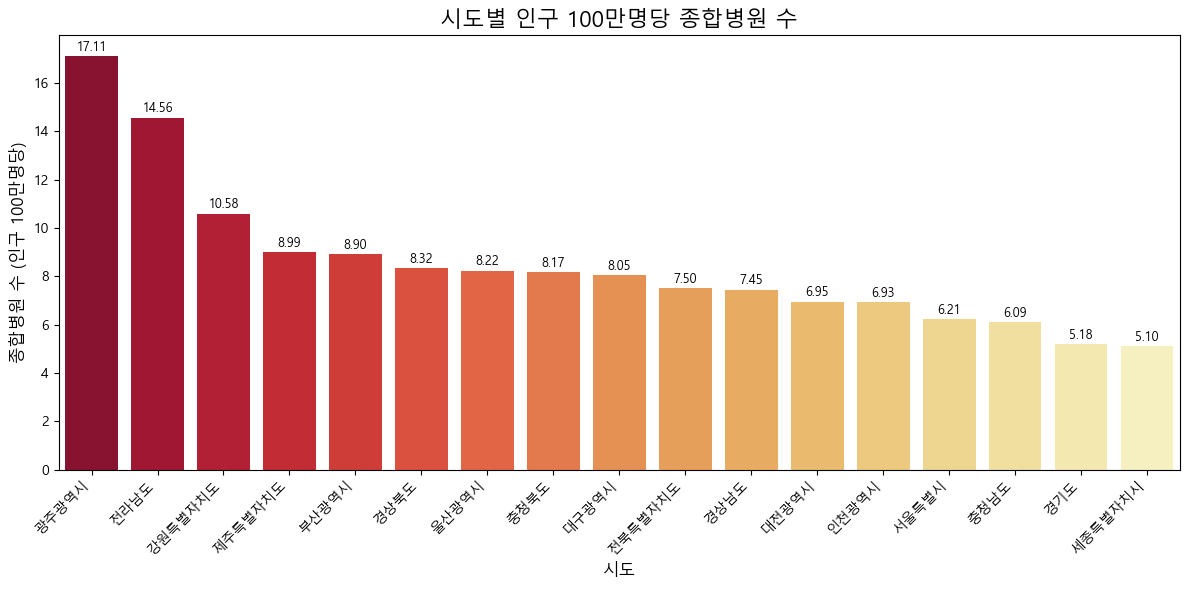

In [42]:
# Ïù∏Íµ¨ 100Îßå Î™ÖÎãπ Ï¢ÖÌï©Î≥ëÏõê Ïàò ÏãúÍ∞ÅÌôî
plot_facility_per_population(
    facility_df=hos_df_f,
    pop_df=pop_by_sido,
    facility_name='Ï¢ÖÌï©Î≥ëÏõê',
    unit=1000000
)

##### 2) Ïù∏Íµ¨ 100ÎßåÎ™Ö ÎåÄÎπÑ Î≥ëÏõêÏàò

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_112\73119675.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged, x='Sido', y=col_name, palette=palette)


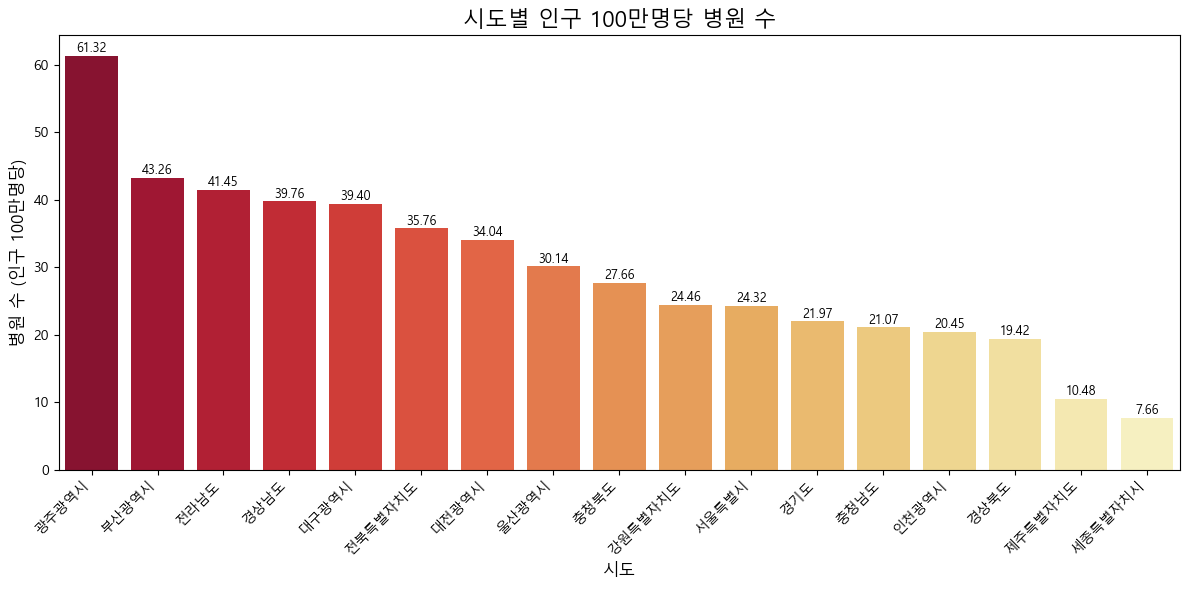

In [43]:
# Ïù∏Íµ¨ 100Îßå Î™ÖÎãπ Î≥ëÏõê Ïàò ÏãúÍ∞ÅÌôî
plot_facility_per_population(
    facility_df=hos_df_f,
    pop_df=pop_by_sido,
    facility_name='Î≥ëÏõê',
    unit=1000000
)

##### 3) Ïù∏Íµ¨ 1ÎßåÎ™Ö ÎåÄÎπÑ ÏùòÏõêÏàò

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_112\73119675.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged, x='Sido', y=col_name, palette=palette)


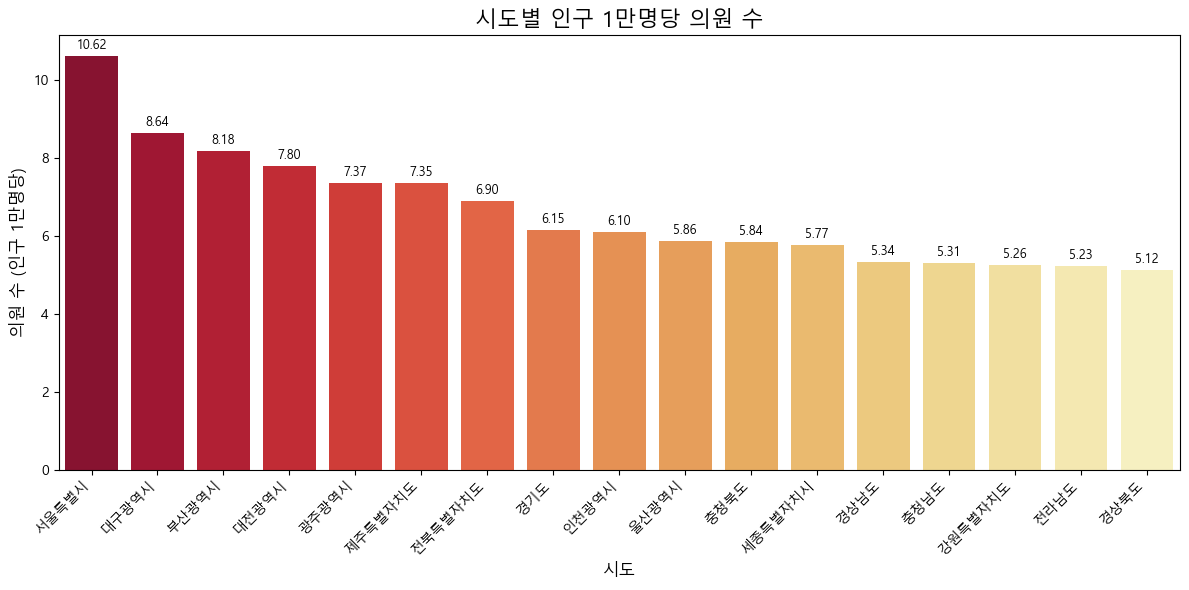

In [44]:
# Ïù∏Íµ¨ 1Îßå Î™ÖÎãπ ÏùòÏõêÏàò ÏãúÍ∞ÅÌôî
plot_facility_per_population(
    facility_df=hos_df_f,
    pop_df=pop_by_sido,
    facility_name='ÏùòÏõê',
    unit=10000
)

##### 4) Ïù∏Íµ¨ 100ÎßåÎ™Ö ÎåÄÎπÑ ÏπòÍ≥ºÎ≥ëÏõêÏàò

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_112\73119675.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged, x='Sido', y=col_name, palette=palette)


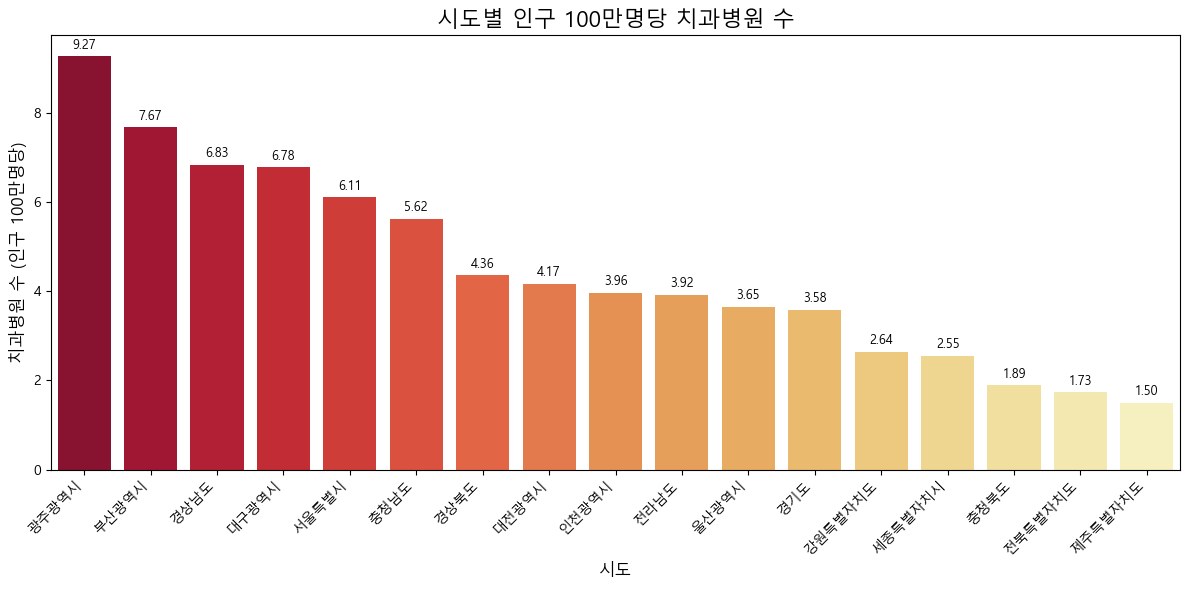

In [45]:
# Ïù∏Íµ¨ 100Îßå Î™ÖÎãπ ÏπòÍ≥ºÎ≥ëÏõêÏàò ÏãúÍ∞ÅÌôî
plot_facility_per_population(
    facility_df=hos_df_f,
    pop_df=pop_by_sido,
    facility_name='ÏπòÍ≥ºÎ≥ëÏõê',
    unit=1000000
)

##### 5) Ïù∏Íµ¨ 10ÎßåÎ™Ö ÎåÄÎπÑ ÏπòÍ≥ºÏùòÏõêÏàò

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_112\73119675.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged, x='Sido', y=col_name, palette=palette)


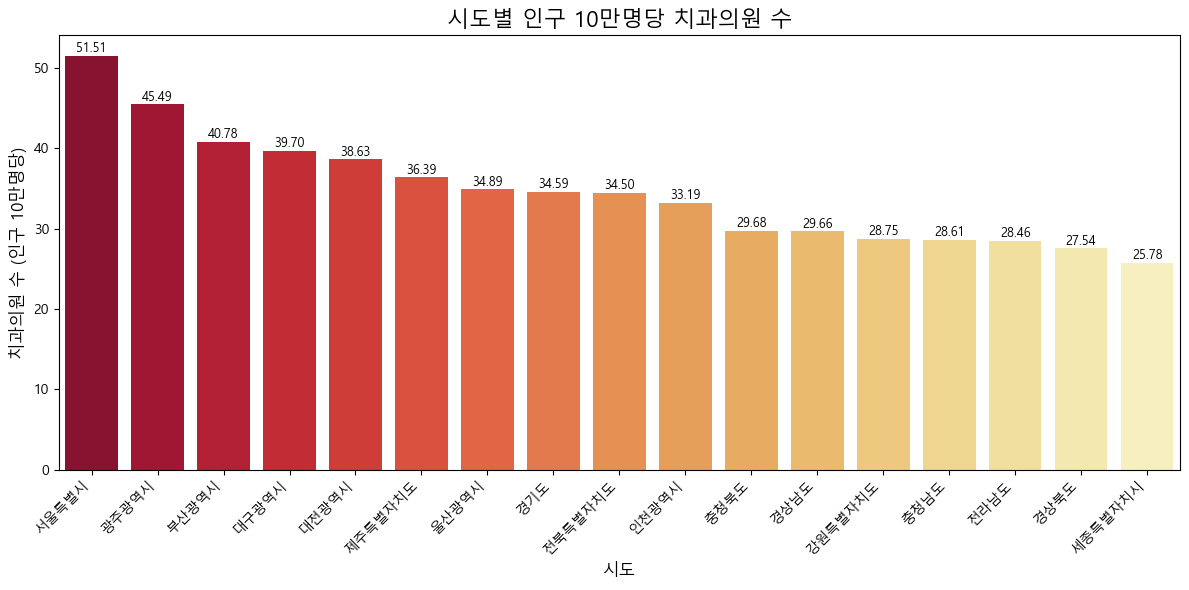

In [46]:
# Ïù∏Íµ¨ 10Îßå Î™ÖÎãπ ÏπòÍ≥ºÏùòÏõêÏàò ÏãúÍ∞ÅÌôî
plot_facility_per_population(
    facility_df=hos_df_f,
    pop_df=pop_by_sido,
    facility_name='ÏπòÍ≥ºÏùòÏõê',
    unit=100000
)

##### 6) Ïù∏Íµ¨ 100ÎßåÎ™Ö ÎåÄÎπÑ ÏöîÏñëÎ≥ëÏõêÏàò

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_112\73119675.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged, x='Sido', y=col_name, palette=palette)


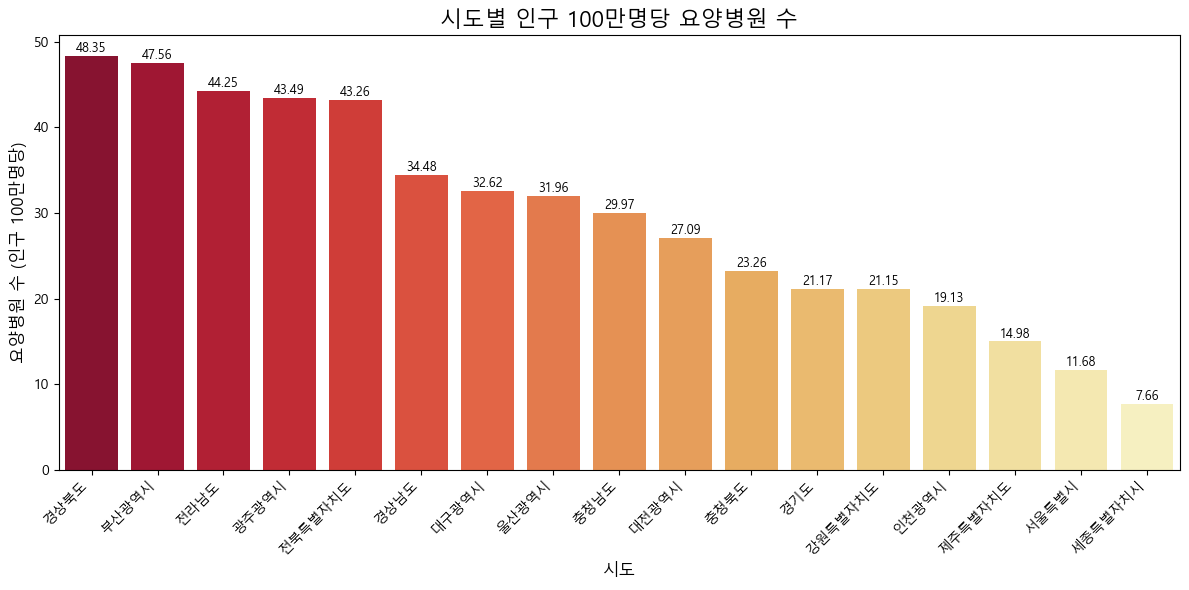

In [47]:
# Ïù∏Íµ¨ 100ÎßåÎ™ÖÎãπ ÏöîÏñëÎ≥ëÏõêÏàò ÏãúÍ∞ÅÌôî
plot_facility_per_population(
    facility_df=hos_df_f,
    pop_df=pop_by_sido,
    facility_name='ÏöîÏñëÎ≥ëÏõê',
    unit=1000000
)

##### 7) Ïù∏Íµ¨ 100ÎßåÎ™Ö ÎåÄÎπÑ ÌïúÎ∞©Î≥ëÏõêÏàò

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_112\73119675.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged, x='Sido', y=col_name, palette=palette)


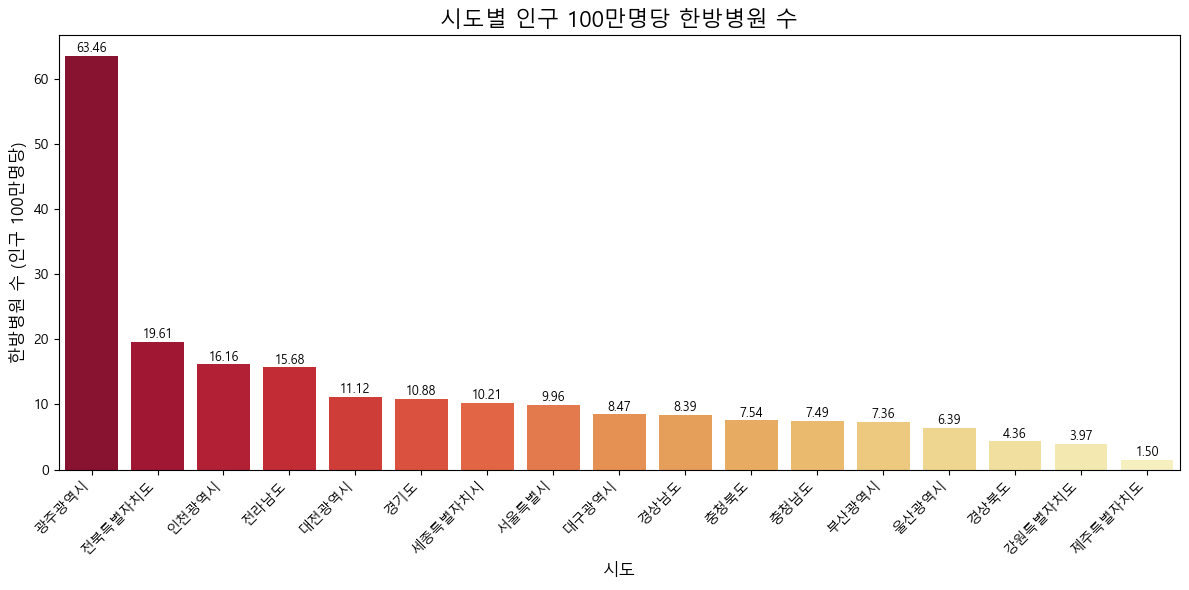

In [48]:
# Ïù∏Íµ¨ 100ÎßåÎ™ÖÎãπ ÌïúÎ∞©Î≥ëÏõêÏàò ÏãúÍ∞ÅÌôî
plot_facility_per_population(
    facility_df=hos_df_f,
    pop_df=pop_by_sido,
    facility_name='ÌïúÎ∞©Î≥ëÏõê',
    unit=1000000
)

##### 8) Ïù∏Íµ¨ 10ÎßåÎ™Ö ÎåÄÎπÑ ÌïúÏùòÏõê Ïàò

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_112\73119675.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged, x='Sido', y=col_name, palette=palette)


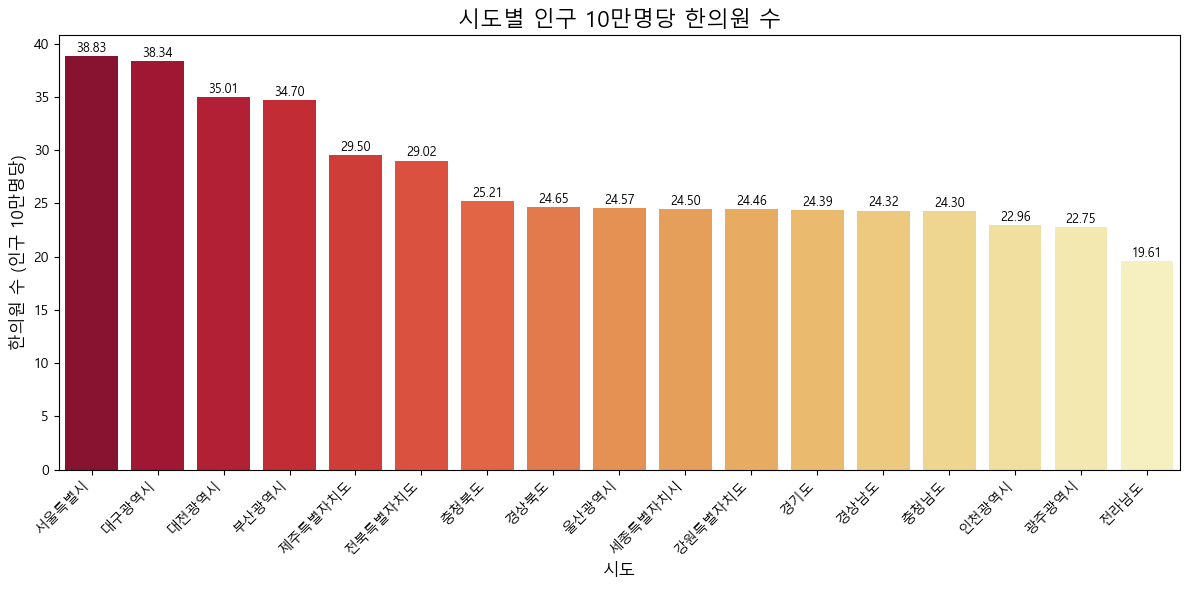

In [49]:
# Ïù∏Íµ¨ 10ÎßåÎ™ÖÎãπ ÌïúÏùòÏõê Ïàò ÏãúÍ∞ÅÌôî
plot_facility_per_population(
    facility_df=hos_df_f,
    pop_df=pop_by_sido,
    facility_name='ÌïúÏùòÏõê',
    unit=100000
)

##### 9) Ïù∏Íµ¨ 10ÎßåÎ™Ö ÎåÄÎπÑ ÏïΩÍµ≠Ïàò

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_112\73119675.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged, x='Sido', y=col_name, palette=palette)


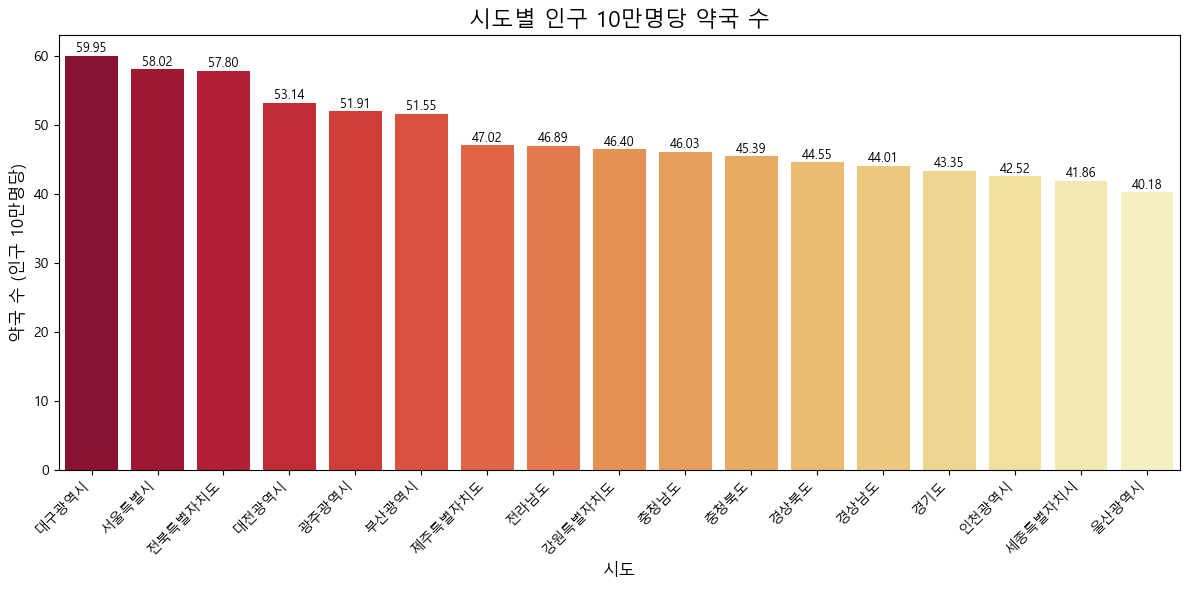

In [50]:
# Ïù∏Íµ¨ 10ÎßåÎ™ÖÎãπ ÏïΩÍµ≠ Ïàò ÏãúÍ∞ÅÌôî
plot_facility_per_population(
    facility_df=ph_df_f,
    pop_df=pop_by_sido,
    facility_name='ÏïΩÍµ≠',
    unit=100000
)

#### 5-1-2) ÏãúÍµ∞Íµ¨Ïóê ÎåÄÌïú ÏùòÎ£åÍ∏∞Í¥Ä ÌÜµÍ≥Ñ (ÏÉÅÏúÑ 15Í∞úÎßå Ï∂îÏ∂ú)

##### 1) Ïù∏Íµ¨ 100ÎßåÎ™Ö ÎåÄÎπÑ Ï¢ÖÌï©Î≥ëÏõêÏàò

In [51]:
# ÏãúÍµ∞Íµ¨Î≥Ñ Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
pop_by_sigungu = pl_df_f.groupby('Sigungu')['pl_count'].sum().reset_index()

# ÏùòÎ£åÍ∏∞Í¥Ä ÌÜµÍ≥Ñ Î∞è ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú ÏÇ¨Ïö©Ïûê Ï†ïÏùò Ìï®Ïàò
def plot_facility_per_population(
    facility_df,               # Î≥ëÏõê/ÏïΩÍµ≠/ÏãúÏÑ§ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    pop_df,                    # Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ (Sido, pl_count ÌïÑÏöî)
    facility_name,             # ÌïÑÌÑ∞ÎßÅÌï† ÏãúÏÑ§ Ïù¥Î¶Ñ (Ïòà: 'ÌïúÏùòÏõê', 'ÏöîÏñëÎ≥ëÏõê')
    unit=100000,               # Ïù∏Íµ¨ Í∏∞Ï§Ä Îã®ÏúÑ (Ïòà: 100000 ‚Üí 10ÎßåÎ™ÖÎãπ)
    palette='YlOrRd_r'           # ÏÉâÏÉÅ ÌåîÎ†àÌä∏
):
    # ÏãúÏÑ§ ÌïÑÌÑ∞ÎßÅ
    filtered = facility_df[facility_df['dutyDivNam'] == facility_name]

    # ÏãúÍµ∞Íµ¨Î≥Ñ ÏãúÏÑ§ Ïàò ÏßëÍ≥Ñ
    count_by_sigungu = filtered.groupby('Sigungu').size().reset_index(name='facility_count')

    # Î≥ëÌï©: ÏãúÍµ∞Íµ¨Î≥Ñ Ïù∏Íµ¨ ÏàòÏôÄ ÏãúÏÑ§ Ïàò
    merged = pd.merge(count_by_sigungu, pop_df, on='Sigungu')

    # Ïù∏Íµ¨ Îã®ÏúÑÎãπ ÏãúÏÑ§ Ïàò Í≥ÑÏÇ∞
    col_name = f'{facility_name}_per_{unit//10000}ÎßåÎ™Ö'
    merged[col_name] = (merged['facility_count'] / merged['pl_count'] * unit).round(2)

    # Ï†ïÎ†¨
    merged = merged.sort_values(by=col_name, ascending=False)
    
    # Í∏∞Ï°¥ merged Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÉÅÏúÑ 15Í∞úÎßå Ï∂îÏ∂ú
    merged_top = merged.head(15)
    
    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 6))
    sns.barplot(data=merged_top, x='Sigungu', y=col_name, palette=palette)

    plt.title(f'ÏãúÍµ∞Íµ¨Î≥Ñ Ïù∏Íµ¨ {unit//10000}ÎßåÎ™ÖÎãπ {facility_name} Ïàò', fontsize=16)
    plt.ylabel(f'{facility_name} Ïàò (Ïù∏Íµ¨ {unit//10000}ÎßåÎ™ÖÎãπ)', fontsize=12)
    plt.xlabel('ÏãúÍµ∞Íµ¨', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    for i, val in enumerate(merged_top[col_name]):
        plt.text(i, val + 0.1, f"{val:.2f}", ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_112\3441851586.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_top, x='Sigungu', y=col_name, palette=palette)


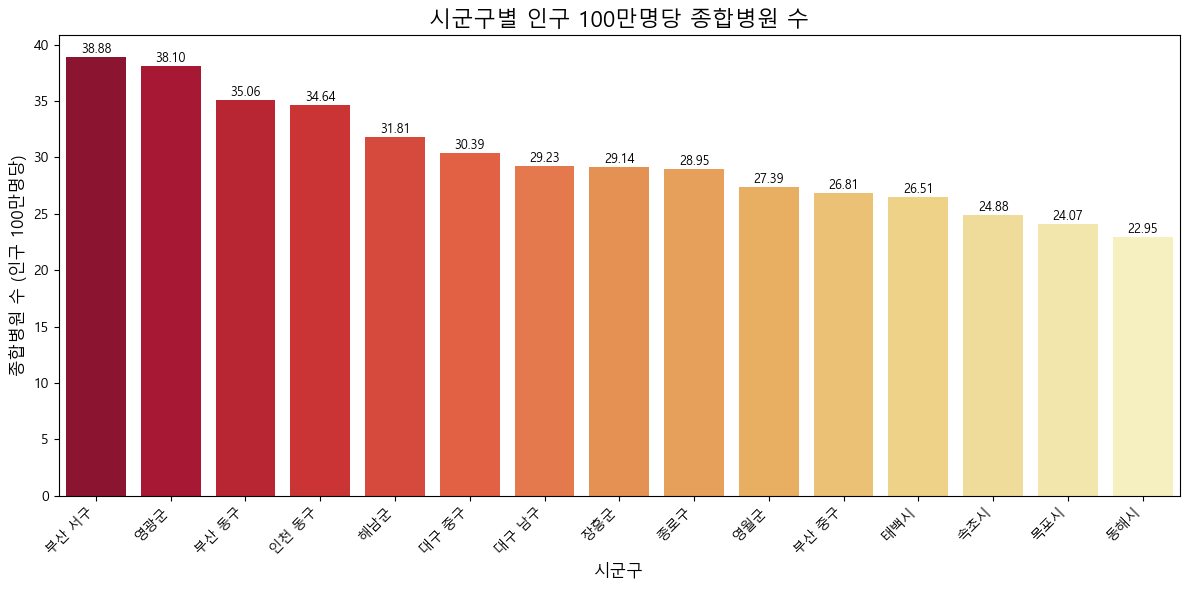

In [52]:
# Ïù∏Íµ¨ 100Îßå Î™ÖÎãπ Ï¢ÖÌï©Î≥ëÏõê Ïàò ÏãúÍ∞ÅÌôî
plot_facility_per_population(
    facility_df=hos_df_f,
    pop_df=pop_by_sigungu,
    facility_name='Ï¢ÖÌï©Î≥ëÏõê',
    unit=1000000
)

##### 2) Ïù∏Íµ¨ 100ÎßåÎ™Ö ÎåÄÎπÑ Î≥ëÏõêÏàò

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_112\3441851586.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_top, x='Sigungu', y=col_name, palette=palette)


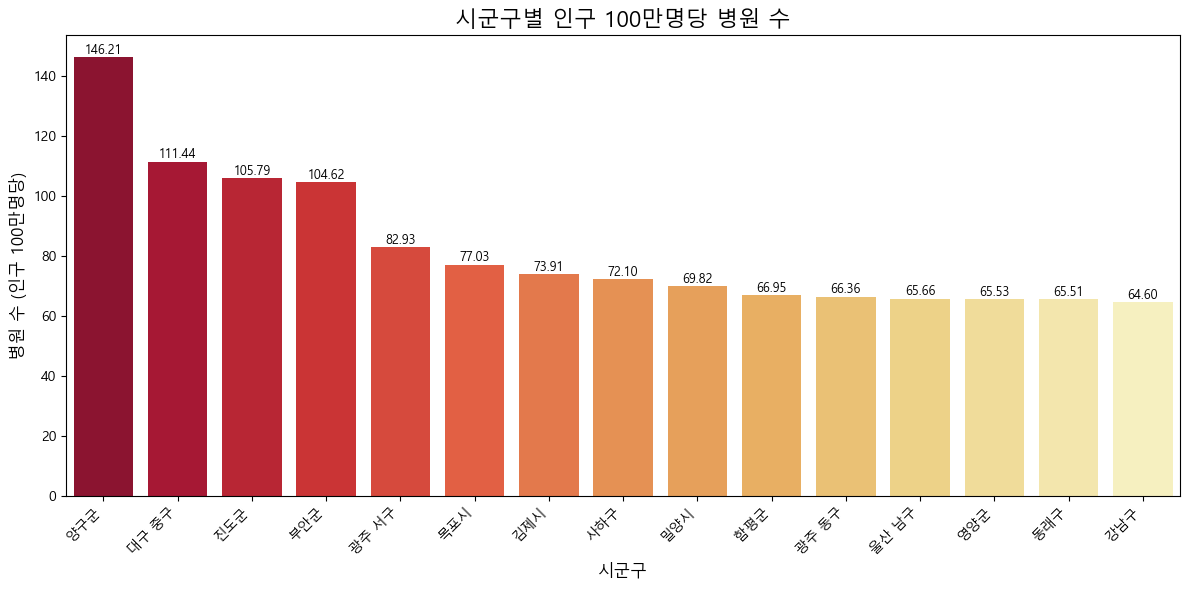

In [53]:
# Ïù∏Íµ¨ 100Îßå Î™ÖÎãπ Î≥ëÏõê Ïàò ÏãúÍ∞ÅÌôî
plot_facility_per_population(
    facility_df=hos_df_f,
    pop_df=pop_by_sigungu,
    facility_name='Î≥ëÏõê',
    unit=1000000
)

##### 3) Ïù∏Íµ¨ 1ÎßåÎ™Ö ÎåÄÎπÑ ÏùòÏõêÏàò

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_112\3441851586.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_top, x='Sigungu', y=col_name, palette=palette)


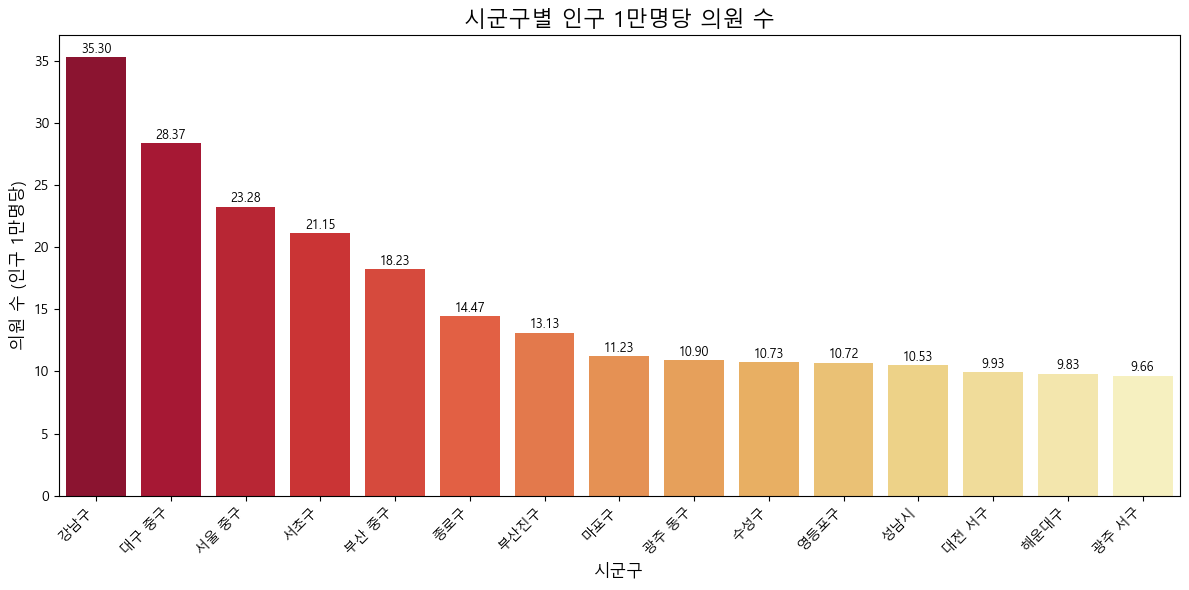

In [54]:
# Ïù∏Íµ¨ 1Îßå Î™ÖÎãπ ÏùòÏõê Ïàò ÏãúÍ∞ÅÌôî
plot_facility_per_population(
    facility_df=hos_df_f,
    pop_df=pop_by_sigungu,
    facility_name='ÏùòÏõê',
    unit=10000
)

##### 4) Ïù∏Íµ¨ 100ÎßåÎ™Ö ÎåÄÎπÑ ÏπòÍ≥ºÎ≥ëÏõêÏàò

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_112\3441851586.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_top, x='Sigungu', y=col_name, palette=palette)


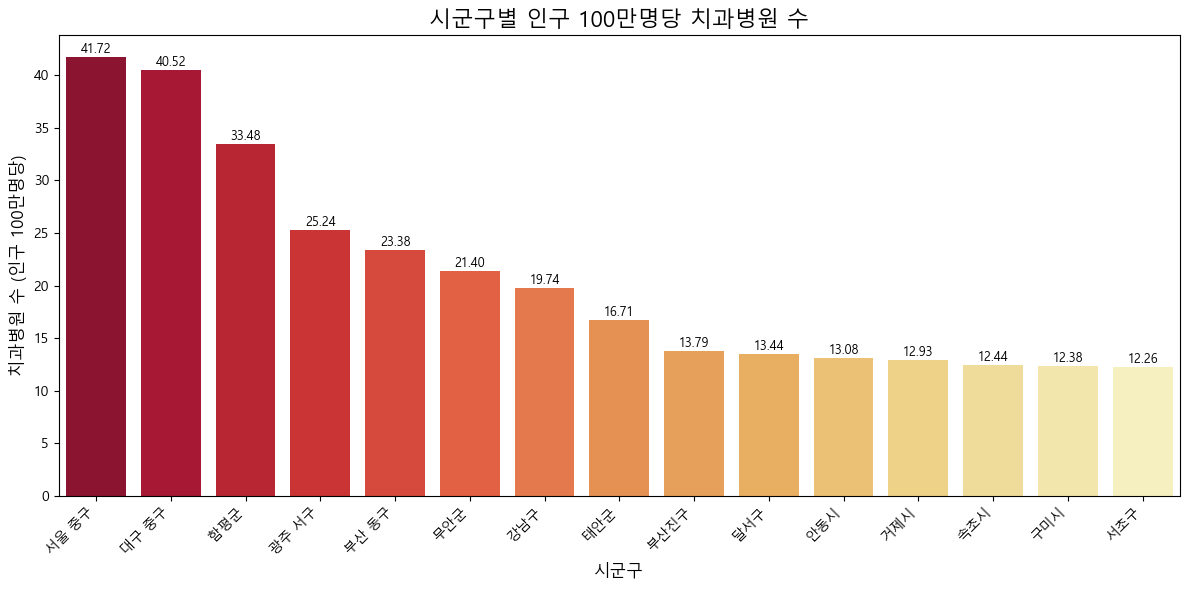

In [55]:
# Ïù∏Íµ¨ 100Îßå Î™ÖÎãπ ÏπòÍ≥ºÎ≥ëÏõê Ïàò ÏãúÍ∞ÅÌôî
plot_facility_per_population(
    facility_df=hos_df_f,
    pop_df=pop_by_sigungu,
    facility_name='ÏπòÍ≥ºÎ≥ëÏõê',
    unit=1000000
)

##### 5) Ïù∏Íµ¨ 10ÎßåÎ™Ö ÎåÄÎπÑ ÏπòÍ≥ºÏùòÏõêÏàò

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_112\3441851586.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_top, x='Sigungu', y=col_name, palette=palette)


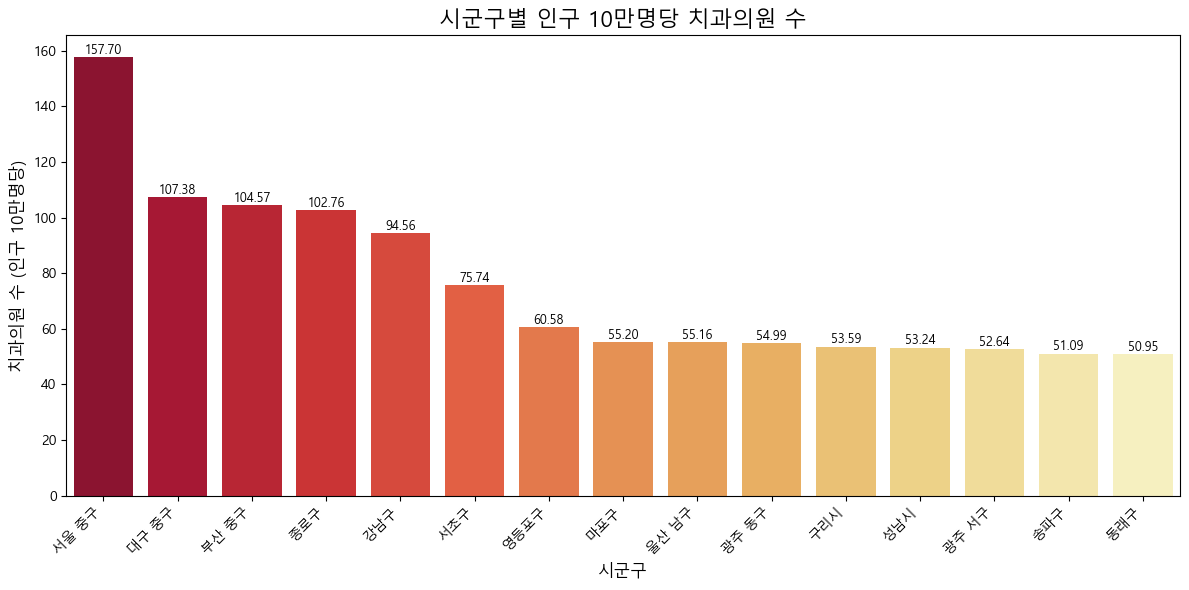

In [56]:
# Ïù∏Íµ¨ 10Îßå Î™ÖÎãπ ÏπòÍ≥ºÏùòÏõê Ïàò ÏãúÍ∞ÅÌôî
plot_facility_per_population(
    facility_df=hos_df_f,
    pop_df=pop_by_sigungu,
    facility_name='ÏπòÍ≥ºÏùòÏõê',
    unit=100000
)

##### 6) Ïù∏Íµ¨ 100ÎßåÎ™Ö ÎåÄÎπÑ ÏπòÍ≥ºÎ≥ëÏõêÏàò

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_112\3441851586.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_top, x='Sigungu', y=col_name, palette=palette)


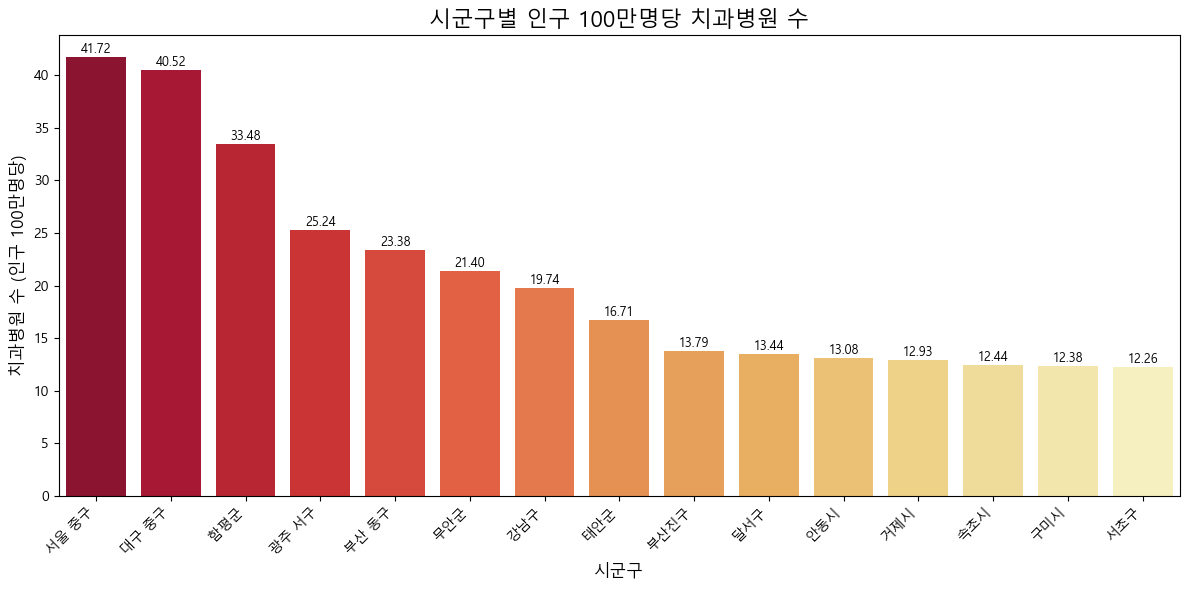

In [57]:
# Ïù∏Íµ¨ 100Îßå Î™ÖÎãπ ÏπòÍ≥ºÎ≥ëÏõê Ïàò ÏãúÍ∞ÅÌôî
plot_facility_per_population(
    facility_df=hos_df_f,
    pop_df=pop_by_sigungu,
    facility_name='ÏπòÍ≥ºÎ≥ëÏõê',
    unit=1000000
)

##### 7) Ïù∏Íµ¨ 100ÎßåÎ™Ö ÎåÄÎπÑ ÌïúÎ∞©Î≥ëÏõêÏàò

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_112\3441851586.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_top, x='Sigungu', y=col_name, palette=palette)


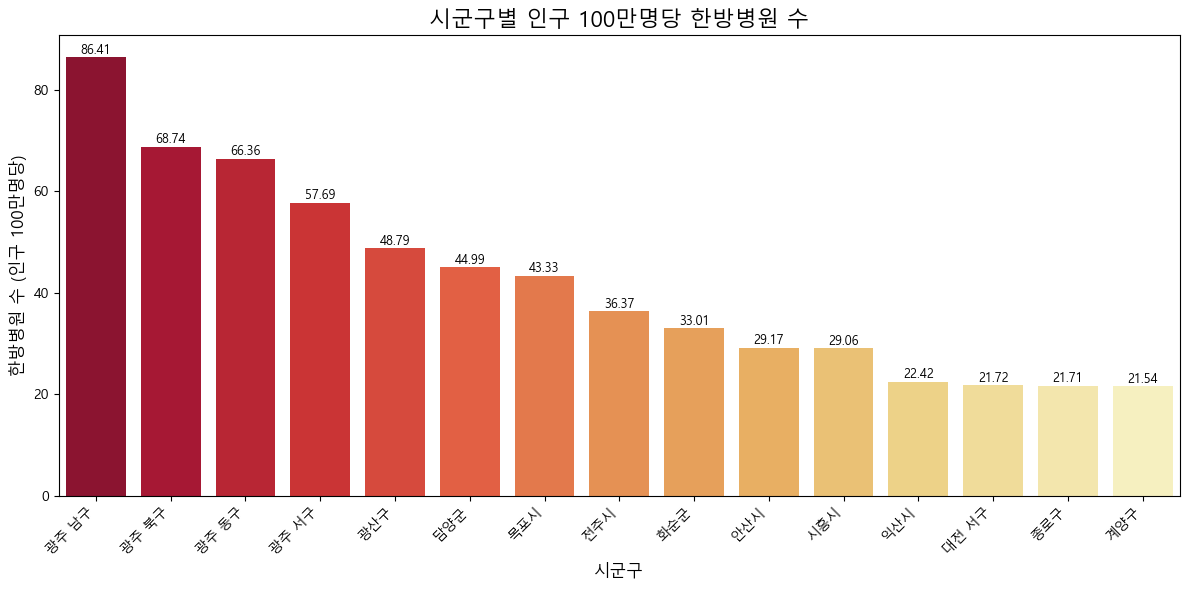

In [58]:
# Ïù∏Íµ¨ 100Îßå Î™ÖÎãπ ÌïúÎ∞©Î≥ëÏõê Ïàò ÏãúÍ∞ÅÌôî
plot_facility_per_population(
    facility_df=hos_df_f,
    pop_df=pop_by_sigungu,
    facility_name='ÌïúÎ∞©Î≥ëÏõê',
    unit=1000000
)

##### 8) Ïù∏Íµ¨ 10ÎßåÎ™Ö ÎåÄÎπÑ ÌïúÏùòÏõêÏàò

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_112\3441851586.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_top, x='Sigungu', y=col_name, palette=palette)


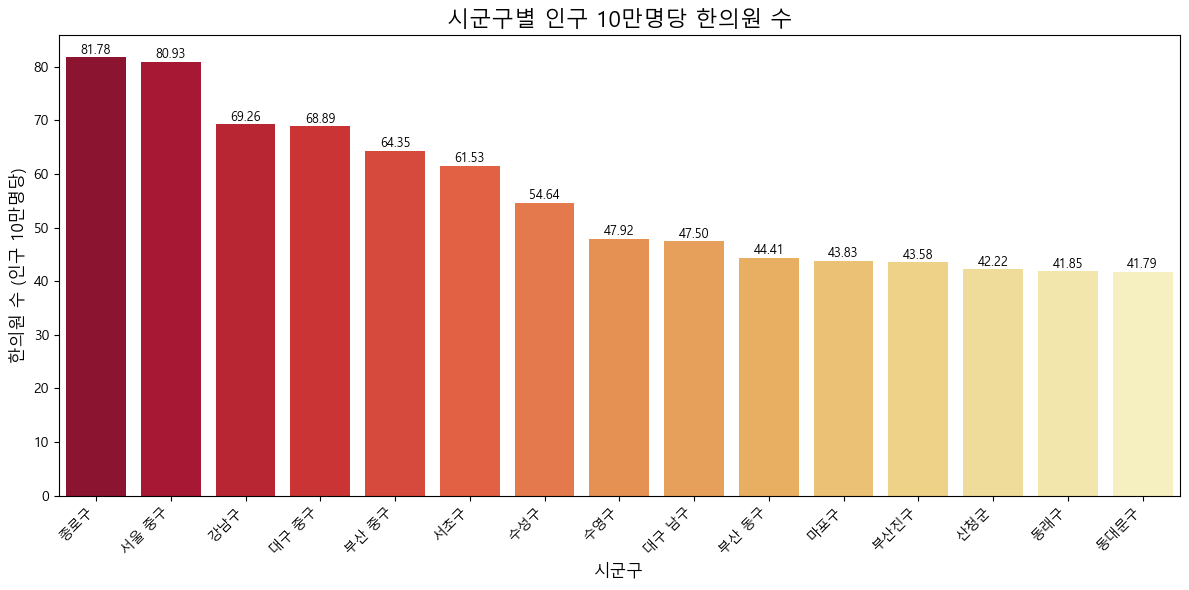

In [59]:
# Ïù∏Íµ¨ 10Îßå Î™ÖÎãπ ÌïúÏùòÏõê Ïàò ÏãúÍ∞ÅÌôî
plot_facility_per_population(
    facility_df=hos_df_f,
    pop_df=pop_by_sigungu,
    facility_name='ÌïúÏùòÏõê',
    unit=100000
)

##### 9) Ïù∏Íµ¨ 10ÎßåÎ™Ö ÎåÄÎπÑ ÏïΩÍµ≠Ïàò

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_112\3441851586.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_top, x='Sigungu', y=col_name, palette=palette)


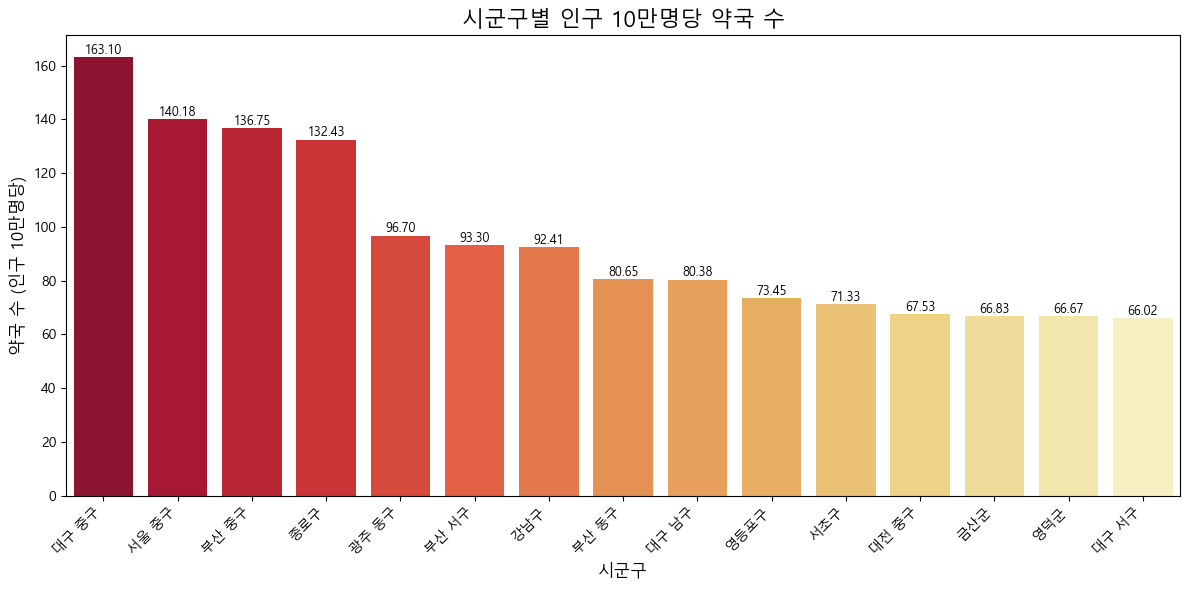

In [60]:
# Ïù∏Íµ¨ 10ÎßåÎ™ÖÎãπ ÏïΩÍµ≠ Ïàò ÏãúÍ∞ÅÌôî
plot_facility_per_population(
    facility_df=ph_df_f,
    pop_df=pop_by_sigungu,
    facility_name='ÏïΩÍµ≠',
    unit=100000
)

### 5-2) Í≥†Î†π Ïù∏Íµ¨ Í¥ÄÎ†® Feature

#### 5-2-1) ÏãúÎèÑ Îã®ÏúÑ ÏßëÍ≥Ñ Í≥†Î†π Ïù∏Íµ¨

In [61]:
# total_pop / pl_count	Ï†ÑÏ≤¥ Ïù∏Íµ¨
# aged_65_plus	65ÏÑ∏ Ïù¥ÏÉÅ Ïù∏Íµ¨ Ïàò
# aged_ratio	65ÏÑ∏ Ïù¥ÏÉÅ ÎπÑÏú® (aged_65_plus / total_pop √ó 100)
# super_aged_area	aged_ratio > 20%Ïù¥Î©¥ 1, ÏïÑÎãàÎ©¥ 0 (Ï¥àÍ≥†Î†π ÏßÄÏó≠ Ïó¨Î∂Ä ÌîåÎûòÍ∑∏)

# Í≥†Î†π Ïù∏Íµ¨ Ïª¨Îüº Ïù¥Î¶Ñ Î≥ÄÍ≤Ω
pl_df_f.rename(columns={'Í≥†Î†π Ïù∏Íµ¨': 'aged_65_plus'}, inplace=True)

# Í≥†Î†π Ïù∏Íµ¨ ÎπÑÏú® Í≥ÑÏÇ∞
pl_df_f['aged_ratio'] = (pl_df_f['aged_65_plus'] / pl_df_f['pl_count'] * 100).round(2)

# Ï¥àÍ≥†Î†π ÏßÄÏó≠ Ïó¨Î∂Ä ÎùºÎ≤®ÎßÅ (20% Ïù¥ÏÉÅ)
pl_df_f['super_aged_area'] = pl_df_f['aged_ratio'].apply(lambda x: 1 if x >= 20 else 0)

# ÏãúÎèÑ Îã®ÏúÑ ÏßëÍ≥Ñ
aged_pop_by_sido = pl_df_f.groupby(['Sido'])[['pl_count', 'aged_65_plus']].sum().reset_index()

# ÏãúÎèÑÎ≥Ñ aged_ratio Í≥ÑÏÇ∞
aged_pop_by_sido['aged_ratio'] = (
    aged_pop_by_sido['aged_65_plus'] / aged_pop_by_sido['pl_count'] * 100
).round(2)

# aged_ratio Í∏∞Ï§ÄÏúºÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨ ÌõÑ ÏÉÅÏúÑ 5Í∞ú ÌôïÏù∏
aged_pop_by_sido.sort_values(by='aged_ratio', ascending=False).head(5)

Sido  pl_count  aged_65_plus  aged_ratio
12     Ï†ÑÎùºÎÇ®ÎèÑ   1785193        491208       27.52
3      Í≤ΩÏÉÅÎ∂ÅÎèÑ   2523173        667063       26.44
0   Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ   1512969        390774       25.83
13  Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ   1733574        444211       25.62
7     Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú   3259219        791106       24.27

#### 5-2-2) ÏãúÍµ∞Íµ¨ Îã®ÏúÑ ÏßëÍ≥Ñ Í≥†Î†π Ïù∏Íµ¨

In [62]:
# ÏãúÎèÑ Îã®ÏúÑ ÏßëÍ≥Ñ
aged_pop_by_sigungu = pl_df_f.groupby(['Sido', 'Sigungu'])[['pl_count', 'aged_65_plus']].sum().reset_index()

# ÏãúÍµ∞Íµ¨Î≥Ñ aged_ratio Í≥ÑÏÇ∞
aged_pop_by_sigungu['aged_ratio'] = (
    aged_pop_by_sigungu['aged_65_plus'] / aged_pop_by_sigungu['pl_count'] * 100
).round(2)

# aged_ratio Í∏∞Ï§ÄÏúºÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨ ÌõÑ ÏÉÅÏúÑ 5Í∞ú ÌôïÏù∏
aged_pop_by_sigungu.sort_values(by='aged_ratio', ascending=False).head(5)

Sido Sigungu  pl_count  aged_65_plus  aged_ratio
84    Í≤ΩÏÉÅÎ∂ÅÎèÑ     ÏùòÏÑ±Íµ∞     48456         23315       48.12
94   ÎåÄÍµ¨Í¥ëÏó≠Ïãú     Íµ∞ÏúÑÍµ∞     22444         10729       47.80
166   Ï†ÑÎùºÎÇ®ÎèÑ     Í≥†Ìù•Íµ∞     60052         27611       45.98
66    Í≤ΩÏÉÅÎÇ®ÎèÑ     Ìï©Ï≤úÍµ∞     39869         18280       45.85
85    Í≤ΩÏÉÅÎ∂ÅÎèÑ     Ï≤≠ÎèÑÍµ∞     40437         18115       44.80

### 5-3) Ï¢ÖÌï© Î∂ÑÏÑù

#### 5-3-1) ÏãúÎèÑÏóê ÎåÄÌïú Î≥ëÏõêÏàò/ÏïΩÍµ≠ Î∞ÄÎèÑ: Ïù∏Íµ¨ 1ÎßåÎ™Ö Îãπ Î≥ëÏõê, ÏïΩÍµ≠Ïàò

In [63]:
# ÏãúÎèÑÎ≥Ñ Î≥ëÏõê/ÏïΩÍµ≠ Ïàò, Ïù∏Íµ¨ Ïàò ÏßëÍ≥Ñ
# ÏãúÎèÑÎ≥Ñ Î≥ëÏõê Ïàò ÏßëÍ≥Ñ
hos_count_by_sido = hos_df_f.groupby('Sido').size().reset_index(name='hos_count')

# ÏãúÎèÑÎ≥Ñ ÏïΩÍµ≠ Ïàò ÏßëÍ≥Ñ
ph_count_by_sido = ph_df_f.groupby('Sido').size().reset_index(name='ph_count')

# pl_df_fÏùò 'Í≥Ñ' Ïó¥Ïùò Ïù¥Î¶ÑÏùÑ 'Count'Î°ú Î≥ÄÍ≤Ω
pl_df_f.rename(columns={'Í≥Ñ': 'pl_count'}, inplace=True)

# ÏãúÎèÑÎ≥Ñ Ïù∏Íµ¨ Ïàò ÏßëÍ≥Ñ
pop_by_sido = pl_df_f.groupby('Sido')['pl_count'].sum().reset_index()

In [64]:
# Î≥ëÏõê/ÏïΩÍµ≠/Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
# Î≥ëÏõê + ÏïΩÍµ≠ Î≥ëÌï©
facility_by_sido = pd.merge(hos_count_by_sido, ph_count_by_sido, on='Sido', how='outer')

# Ïù∏Íµ¨ÏôÄ Î≥ëÌï©
merged_by_sido = pd.merge(facility_by_sido, pop_by_sido, on='Sido', how='left')

Î≥ëÏõê Î∞ÄÎèÑ Í∏∞Ï§ÄÏúºÎ°ú Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨

In [65]:
# Î∞ÄÎèÑÍ≥ÑÏÇ∞: Ïù∏Íµ¨ 100ÎßåÎ™ÖÎãπ Î≥ëÏõê/ÏïΩÍµ≠ Ïàò rate: ÎπÑÏú®
merged_by_sido['hos_rate'] = (merged_by_sido['hos_count'] / merged_by_sido['pl_count'] * 10000).round(2)
merged_by_sido['ph_rate'] = (merged_by_sido['ph_count'] / merged_by_sido['pl_count'] * 10000).round(2)

# Î≥ëÏõê Î∞ÄÎèÑ Í∏∞Ï§ÄÏúºÎ°ú Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨
result_by_sido = merged_by_sido.sort_values(by='hos_rate', ascending=True)

df_result = result_by_sido[['Sido', 'pl_count', 'hos_count', 'hos_rate']].copy()
df_result.head(5)

Sido  pl_count  hos_count  hos_rate
9   ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú    391812        454     11.59
11    Ïù∏Ï≤úÍ¥ëÏó≠Ïãú   3031361       3829     12.63
0   Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ   1512969       1947     12.87
10    Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú   1095014       1410     12.88
1       Í≤ΩÍ∏∞ÎèÑ  13699381      17720     12.93

ÏïΩÍµ≠ ÎπÑÏú® Í∏∞Ï§ÄÏúºÎ°ú Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨

In [66]:
# ÏïΩÍµ≠ ÎπÑÏú® Í∏∞Ï§ÄÏúºÎ°ú Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨
result_by_sido = merged_by_sido.sort_values(by='ph_rate', ascending=True)

df_result = result_by_sido[['Sido', 'pl_count', 'ph_count', 'ph_rate']].copy()
df_result.head(5)

Sido  pl_count  ph_count  ph_rate
10    Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú   1095014       440     4.02
9   ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú    391812       164     4.19
11    Ïù∏Ï≤úÍ¥ëÏó≠Ïãú   3031361      1289     4.25
1       Í≤ΩÍ∏∞ÎèÑ  13699381      5939     4.34
2      Í≤ΩÏÉÅÎÇ®ÎèÑ   3219574      1417     4.40

#### 5-3-1) ÏãúÍµ∞Íµ¨Ïóê ÎåÄÌïú Î≥ëÏõê Ïäà/ÏïΩÍµ≠ Î∞ÄÎèÑ: Ïù∏Íµ¨ 1ÎßåÎ™ÖÎãπ Î≥ëÏõê, ÏïΩÍµ≠Ïàò

In [67]:
# ÏãúÎèÑ + ÏãúÍµ∞Íµ¨ Îã®ÏúÑ Î≥ëÏõê Ïàò ÏßëÍ≥Ñ
hos_count_by_sigungu = hos_df_f.groupby(['Sido', 'Sigungu']).size().reset_index(name='hos_count')

# ÏãúÎèÑ + ÏãúÍµ∞Íµ¨ Îã®ÏúÑ ÏïΩÍµ≠ Ïàò ÏßëÍ≥Ñ
ph_count_by_sigungu = ph_df_f.groupby(['Sido', 'Sigungu']).size().reset_index(name='ph_count')
 
# ÏãúÎèÑ + ÏãúÍµ∞Íµ¨ Îã®ÏúÑ Ïù∏Íµ¨ Ïàò ÏßëÍ≥Ñ
pop_by_sigungu = pl_df_f.groupby(['Sido', 'Sigungu'])['pl_count'].sum().reset_index()

In [68]:
# Î≥ëÏõê/ÏïΩÍµ≠/Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
# Î≥ëÏõê + ÏïΩÍµ≠ Î≥ëÌï©
facility_by_sigungu = pd.merge(hos_count_by_sigungu, ph_count_by_sigungu, on='Sigungu', how='outer')

# Ïù∏Íµ¨ÏôÄ Î≥ëÌï©
merged_by_sigungu = pd.merge(facility_by_sigungu, pop_by_sigungu, on='Sigungu', how='left')

Î≥ëÏõê ÎπÑÏú® Í∏∞Ï§ÄÏúºÎ°ú Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨

In [69]:
# ÎπÑÏú®Í≥ÑÏÇ∞: Ïù∏Íµ¨ 1ÎßåÎ™ÖÎãπ Î≥ëÏõê/ÏïΩÍµ≠ Ïàò
merged_by_sigungu['hos_rate'] = (merged_by_sigungu['hos_count'] / merged_by_sigungu['pl_count'] * 10000).round(2)
merged_by_sigungu['ph_rate'] = (merged_by_sigungu['ph_count'] / merged_by_sigungu['pl_count'] * 10000).round(2)

# Î≥ëÏõê ÎπÑÏú® Í∏∞Ï§ÄÏúºÎ°ú Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨
result_by_sigungu = merged_by_sigungu.sort_values(by='hos_rate', ascending=True)

df_result = result_by_sigungu[['Sido', 'Sigungu', 'pl_count', 'hos_count', 'hos_rate']].copy()
df_result.head(10)

Sido Sigungu  pl_count  hos_count  hos_rate
82      Í≤ΩÏÉÅÎ∂ÅÎèÑ     Ïö∏Î¶âÍµ∞      9040          6      6.64
35       Í≤ΩÍ∏∞ÎèÑ     ÏñëÏ£ºÏãú    290250        236      8.13
164    Ïù∏Ï≤úÍ¥ëÏó≠Ïãú   Ïù∏Ï≤ú Ï§ëÍµ¨    171635        145      8.45
152    Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú   Ïö∏ÏÇ∞ Î∂ÅÍµ¨    215755        187      8.67
111    Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú  Î∂ÄÏÇ∞ Í∞ïÏÑúÍµ¨    142703        127      8.90
22       Í≤ΩÍ∏∞ÎèÑ     Í¥ëÏ£ºÏãú    396930        355      8.94
9    Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ     Ïù∏Ï†úÍµ∞     31146         28      8.99
154    Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú     Ïö∏Ï£ºÍµ∞    218402        202      9.25
6    Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ     ÏñëÏñëÍµ∞     27452         26      9.47
44       Í≤ΩÍ∏∞ÎèÑ     ÌååÏ£ºÏãú    515493        504      9.78

ÏïΩÍµ≠ ÎπÑÏú® Í∏∞Ï§ÄÏúºÎ°ú Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨

In [70]:
# ÏïΩÍµ≠ ÎπÑÏú® Í∏∞Ï§ÄÏúºÎ°ú Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨
result_by_sigungu = merged_by_sigungu.sort_values(by='ph_rate', ascending=True)

df_result = result_by_sigungu[['Sido', 'Sigungu', 'pl_count', 'ph_count', 'ph_rate']].copy()
df_result.head(10)

Sido Sigungu  pl_count  ph_count  ph_rate
176   Ï†ÑÎùºÎÇ®ÎèÑ     Ïã†ÏïàÍµ∞     38694         7     1.81
161  Ïù∏Ï≤úÍ¥ëÏó≠Ïãú     ÏòπÏßÑÍµ∞     19796         4     2.02
82    Í≤ΩÏÉÅÎ∂ÅÎèÑ     Ïö∏Î¶âÍµ∞      9040         2     2.21
78    Í≤ΩÏÉÅÎ∂ÅÎèÑ     ÏòÅÏñëÍµ∞     15261         4     2.62
152  Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú   Ïö∏ÏÇ∞ Î∂ÅÍµ¨    215755        58     2.69
41     Í≤ΩÍ∏∞ÎèÑ     ÏùòÏôïÏãú    153951        47     3.05
111  Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú  Î∂ÄÏÇ∞ Í∞ïÏÑúÍµ¨    142703        44     3.08
154  Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú     Ïö∏Ï£ºÍµ∞    218402        68     3.11
94   ÎåÄÍµ¨Í¥ëÏó≠Ïãú     Íµ∞ÏúÑÍµ∞     22444         7     3.12
81    Í≤ΩÏÉÅÎ∂ÅÎèÑ     ÏòàÏ≤úÍµ∞     54301        17     3.13

## 6. Î™®Îç∏ÎßÅ_ÏßÑÌñâÌï¥Ïïº Ìï®
Ï£ºÏ†ú: ÏùòÎ£å Ïù∏ÌîÑÎùº Î∂ÑÌè¨Ïóê Í∏∞Î∞òÌïú ÏùòÎ£å Ï∑®ÏïΩÏßÄ ÌÉêÏÉâ Î∞è Í≥†Î†πÏù∏Íµ¨ ÏùòÎ£åÏ†ëÍ∑ºÏÑ± Ìñ•ÏÉÅÏùÑ ÏúÑÌïú ÏãúÍ∞ÅÌôî ÏûêÎ£å Íµ¨Ï∂ï

Î™©Ï†Å: ÏãúÍµ∞Íµ¨ Îã®ÏúÑÏóêÏÑú Î≥ëÏõê/ÏïΩÍµ≠ ÏùòÎ£å Ïù∏ÌîÑÎùºÍ∞Ä Î∂ÄÏ°±ÌïòÍ±∞ÎÇò Í≥†Î†πÌôî ÏàòÏ§ÄÏóê ÎπÑÌï¥ Ïù∏ÌîÑÎùºÍ∞Ä Î∂ÄÏ°±Ìïú ÏßÄÏó≠ ÌÉêÏÉâ

Í≥µÍ≥µÎ≥¥Í±¥ÏùòÎ£åÏóê Í¥ÄÌïú Î≤ïÎ•† Ï†ú12Ï°∞(ÏùòÎ£åÏ∑®ÏïΩÏßÄÏùò ÏßÄÏ†ï„ÜçÍ≥†Ïãú) 
  1. Ïù∏Íµ¨ Ïàò, ÏÑ±Î≥Ñ„ÜçÏó∞Î†πÎ≥Ñ Ïù∏Íµ¨ Î∂ÑÌè¨, ÏÜåÎìù Îì±Ïóê Îî∞Î•∏ ÏßÄÏó≠ ÎÇ¥ Íµ≠ÎØºÏùò ÏùòÎ£å Ïù¥Ïö© Ïã§ÌÉúÏóê Í¥ÄÌïú ÏÇ¨Ìï≠
  2. ÏùòÎ£åÏù∏Î†•„ÜçÏùòÎ£åÍ∏∞Í¥ÄÏùò Ïàò Îì± ÏßÄÏó≠ ÎÇ¥ ÏùòÎ£åÍ≥µÍ∏âÏóê Í¥ÄÌïú ÏÇ¨Ìï≠
  3. ÏßÄÏó≠Ï†Å ÌäπÏÑ± Îì±ÏùÑ Í≥†Î†§Ìïú ÏùòÎ£åÍ∏∞Í¥Ä Ï†ëÍ∑ºÏÑ±Ïóê Í¥ÄÌïú ÏÇ¨Ìï≠
  4. Í∑∏ Î∞ñÏóê ÏùòÎ£å Ïù¥Ïö© Ïã§ÌÉú Î∞è ÏùòÎ£åÏûêÏõê Í≥µÍ∏âÏóê Í¥ÄÌïú ÏÇ¨Ìï≠ÏúºÎ°úÏÑú Î≥¥Í±¥Î≥µÏßÄÎ∂ÄÏû•Í¥ÄÏù¥ Ï†ïÌïòÎäî ÏÇ¨Ìï≠

### 6-1-1) ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í∏∞Î∞ò ÏßÄÏó≠ Ïú†Ìòï Î∂ÑÎ•ò Î™®Îç∏ÎßÅ (KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏïåÍ≥†Î¶¨Ï¶ò)
- Î™©Ìëú: ÎπÑÏä∑Ìïú ÏßÄÏó≠Îì§ÎÅºÎ¶¨ ÏûêÎèôÏúºÎ°ú Í∑∏Î£πÌôîÌïòÍ≥†, Ïù¥Î•º Í∏∞Î∞òÏúºÎ°ú ÏßÄÏó≠ Ïú†Ìòï Î∂ÑÏÑù

In [88]:
# Î≥ëÏõê + ÏïΩÍµ≠ Î≥ëÌï©
infra_detail_df = pd.concat([hos_df_f, ph_df_f], ignore_index=True)

# ÏïΩÍµ≠ Îç∞Ïù¥ÌÑ∞: 'ÏùòÎ£åÍ∏∞Í¥ÄÍµ¨Î∂Ñ'Ïù¥ 1Ïù¥Í≥†, 'dutyDivNam'Ïóê 'ÏïΩÍµ≠'Ïù¥ Ìè¨Ìï®Îêú Í≤ΩÏö∞
ph_df = infra_detail_df[
    (infra_detail_df['ÏùòÎ£åÍ∏∞Í¥ÄÍµ¨Î∂Ñ'] == 1) &
    (infra_detail_df['dutyDivNam'].str.contains('ÏïΩÍµ≠', na=False))
]

# Î≥ëÏõê Îç∞Ïù¥ÌÑ∞: ÎÇòÎ®∏ÏßÄ Ï†ÑÎ∂Ä (Ï¶â, ÏïΩÍµ≠ÏùÑ Ï†úÏô∏Ìïú Í≤É)
hos_df = infra_detail_df.drop(ph_df.index)

# Î≥ëÏõê Ïàò ÏßëÍ≥Ñ
hos_count = hos_df.groupby(['Sido', 'Sigungu']).size().reset_index(name='hos_count')

# ÏïΩÍµ≠ Ïàò ÏßëÍ≥Ñ
ph_count = ph_df.groupby(['Sido', 'Sigungu']).size().reset_index(name='ph_count')

# Ïù∏Íµ¨ Í∏∞Î∞ò Îç∞Ïù¥ÌÑ∞ÏôÄ Î≥ëÌï©
infra_df = pl_df_f.merge(hos_count, on=['Sido', 'Sigungu'], how='left')
infra_df = infra_df.merge(ph_count, on=['Sido', 'Sigungu'], how='left')
infra_df.fillna({'hos_count': 0, 'ph_count': 0}, inplace=True)

# Ï†ëÍ∑ºÏÑ± ÏßÄÌëú Í≥ÑÏÇ∞
infra_df['hospital_per_1000_aged'] = infra_df['hos_count'] / (infra_df['aged_65_plus'] / 1000 + 1)
infra_df['pharmacy_per_1000_aged'] = infra_df['ph_count'] / (infra_df['aged_65_plus'] / 1000 + 1)

# aged_ratioÎèÑ Ï∂îÍ∞Ä (Î™®Îç∏ÎßÅ/ÌïÑÌÑ∞ÎßÅÏö©)
infra_df['aged_ratio'] = (infra_df['aged_65_plus'] / infra_df['pl_count'] * 100).round(2)

# ÌïòÏúÑ 25% Í∏∞Ï§Ä
threshold_hos = infra_df['hospital_per_1000_aged'].quantile(0.25)
threshold_ph = infra_df['pharmacy_per_1000_aged'].quantile(0.25)

infra_df['maybe_vulnerable_hos'] = infra_df['hospital_per_1000_aged'] < threshold_hos
infra_df['maybe_vulnerable_ph'] = infra_df['pharmacy_per_1000_aged'] < threshold_ph

infra_detail_df['ÏùòÎ£åÍ∏∞Í¥ÄÍµ¨Î∂Ñ'].value_counts()

1    98476
2     3961
0      164
3       44
Name: ÏùòÎ£åÍ∏∞Í¥ÄÍµ¨Î∂Ñ, dtype: int64

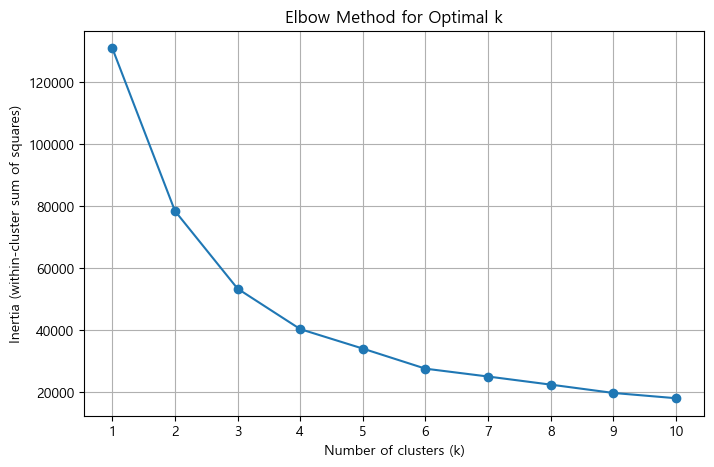

In [89]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏóê ÏÇ¨Ïö©Ìï† Î≥ÄÏàò ÏÑ†ÌÉù
cluster_features = [
    'pl_count', 'aged_65_plus', 'aged_ratio',
    'hos_count', 'ph_count', 'hospital_per_1000_aged', 'pharmacy_per_1000_aged'
]

# ÌëúÏ§ÄÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(infra_df[cluster_features])

# Elbow Í∏∞Î≤ïÏö© inertia Ï†ÄÏû•
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (within-cluster sum of squares)")
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [90]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# ÏÇ¨Ïö©Ìï† Î≥ÄÏàò
cluster_features = [
    'pl_count', 'aged_65_plus', 'aged_ratio',
    'hos_count', 'ph_count', 'hospital_per_1000_aged', 'pharmacy_per_1000_aged'
]

# Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(infra_df[cluster_features])

# ÏµúÏ†Å k=4Î°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=4, random_state=42)
infra_df['cluster'] = kmeans.fit_predict(X_scaled)

print("\nüìä Íµ∞ÏßëÎ≥Ñ ÌäπÏÑ± ÌèâÍ∑†Í∞í:")
cluster_summary = infra_df.groupby('cluster')[cluster_features].mean().round(2)
print(cluster_summary)


üìä Íµ∞ÏßëÎ≥Ñ ÌäπÏÑ± ÌèâÍ∑†Í∞í:
         pl_count  aged_65_plus  aged_ratio  hos_count  ph_count  \
cluster                                                            
0          357.39        149.02       49.01     107.08     34.09   
1         1965.16        388.87       36.51    1069.23    360.51   
2        53495.87       9777.18       18.68     837.28    263.05   
3         4119.63        750.00       30.46     394.25    137.85   

         hospital_per_1000_aged  pharmacy_per_1000_aged  
cluster                                                  
0                         94.36                   29.96  
1                        841.38                  285.46  
2                         98.20                   31.23  
3                        273.11                   96.00  


<Figure size 1200x600 with 0 Axes>

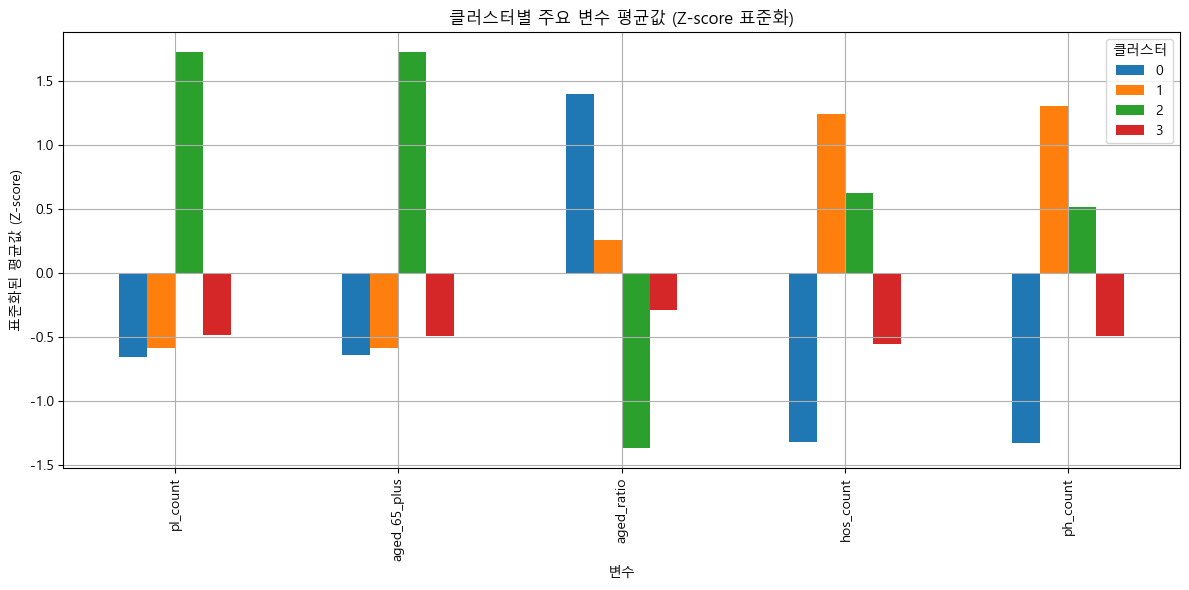

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Ï£ºÏöî Î≥ÄÏàò Î∞è ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïª¨Îüº
variables = [
    'pl_count', 'aged_65_plus', 'aged_ratio',
    'hos_count', 'ph_count'
]
cluster_col = 'cluster'

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
cluster_means = infra_df.groupby(cluster_col)[variables].mean()

# ÌëúÏ§ÄÌôî
scaler = StandardScaler()
cluster_means_scaled = pd.DataFrame(
    scaler.fit_transform(cluster_means),
    index=cluster_means.index,
    columns=cluster_means.columns
)

# Î∞î Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
cluster_means_scaled.T.plot(kind='bar', figsize=(12, 6))
plt.title('ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï£ºÏöî Î≥ÄÏàò ÌèâÍ∑†Í∞í (Z-score ÌëúÏ§ÄÌôî)')
plt.xlabel('Î≥ÄÏàò')
plt.ylabel('ÌëúÏ§ÄÌôîÎêú ÌèâÍ∑†Í∞í (Z-score)')
plt.legend(title='ÌÅ¥Îü¨Ïä§ÌÑ∞')
plt.grid(True)
plt.tight_layout()
plt.show()


üìã RandomForest (ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎØ∏Ìè¨Ìï®) ÏÑ±Îä•:
              precision    recall  f1-score   support

       False      0.985     0.989     0.987      3554
        True      0.782     0.723     0.751       188

    accuracy                          0.976      3742
   macro avg      0.884     0.856     0.869      3742
weighted avg      0.975     0.976     0.976      3742


üìã RandomForest (ÌÅ¥Îü¨Ïä§ÌÑ∞ Ìè¨Ìï®) ÏÑ±Îä•:
              precision    recall  f1-score   support

       False      0.985     0.989     0.987      3554
        True      0.778     0.707     0.741       188

    accuracy                          0.975      3742
   macro avg      0.881     0.848     0.864      3742
weighted avg      0.974     0.975     0.975      3742



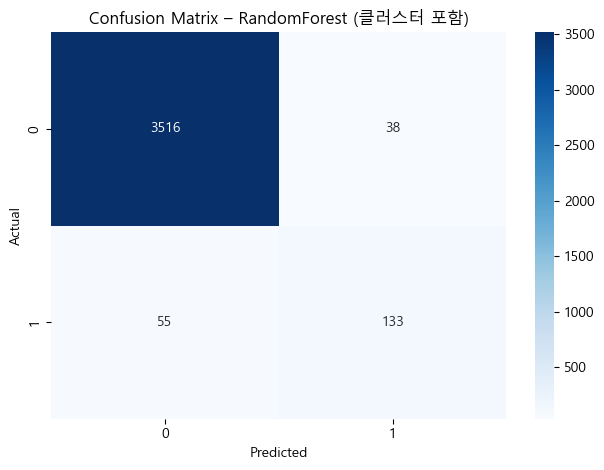

D:\anaconda\envs\py310\lib\site-packages\xgboost\training.py:183: UserWarning: [17:34:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



üìã XGBoost (ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎØ∏Ìè¨Ìï®) ÏÑ±Îä•:
              precision    recall  f1-score   support

       False      0.998     0.981     0.989      3554
        True      0.726     0.957     0.826       188

    accuracy                          0.980      3742
   macro avg      0.862     0.969     0.907      3742
weighted avg      0.984     0.980     0.981      3742



D:\anaconda\envs\py310\lib\site-packages\xgboost\training.py:183: UserWarning: [17:34:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



üìã XGBoost (ÌÅ¥Îü¨Ïä§ÌÑ∞ Ìè¨Ìï®) ÏÑ±Îä•:
              precision    recall  f1-score   support

       False      0.997     0.980     0.988      3554
        True      0.714     0.941     0.812       188

    accuracy                          0.978      3742
   macro avg      0.855     0.961     0.900      3742
weighted avg      0.983     0.978     0.980      3742



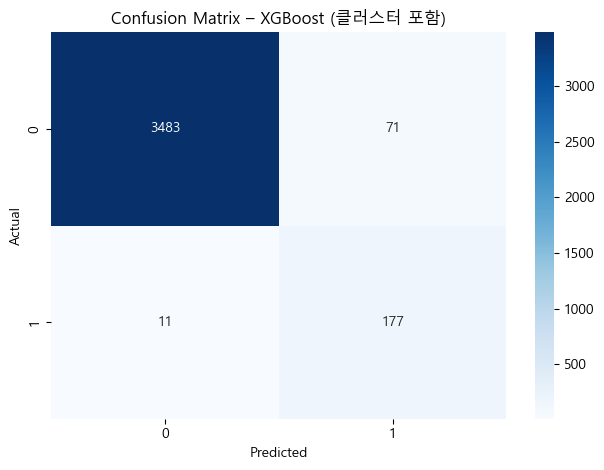

[LightGBM] [Info] Number of positive: 812, number of negative: 14156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 906
[LightGBM] [Info] Number of data points in the train set: 14968, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.054249 -> initscore=-2.858394
[LightGBM] [Info] Start training from score -2.858394

üìã LightGBM (ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎØ∏Ìè¨Ìï®) ÏÑ±Îä•:
              precision    recall  f1-score   support

       False      0.997     0.970     0.983      3554
        True      0.626     0.952     0.755       188

    accuracy                          0.969      3742
   macro avg      0.812     0.961     0.869      3742
weighted avg      0.979     0.969     0.972      3742

[LightGBM] [Info] Number of positive: 812, number of negative: 14156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the over

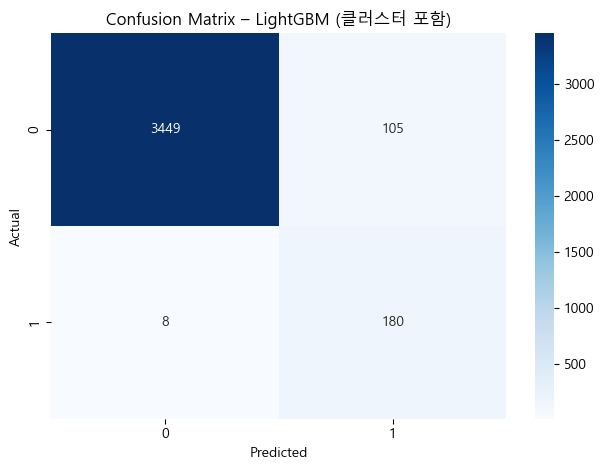

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# target ÏÑ§Ï†ï
target = 'maybe_vulnerable'

# ÌîºÏ≤ò Ï†ïÏùò
features_without_cluster = [
    'pl_count', 'aged_65_plus', 'ph_count', 'pharmacy_per_1000_aged'
]
features_with_cluster = features_without_cluster + ['cluster']

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
df_model = infra_df.dropna(subset=features_with_cluster + [target])
X1 = df_model[features_without_cluster]
X2 = df_model[features_with_cluster]
y = df_model[target]

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
X2_train, X2_test = train_test_split(X2, test_size=0.2, random_state=42)

# ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï ÎπÑÏú® Í≥ÑÏÇ∞
scale_pos_weight = np.sum(y == 0) / np.sum(y == 1)

# Î™®Îç∏ Î¶¨Ïä§Ìä∏
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight),
    "LightGBM": LGBMClassifier(random_state=42, scale_pos_weight=scale_pos_weight)
}

#ÌïôÏäµ Î∞è ÌèâÍ∞Ä Ìï®Ïàò
def train_and_evaluate(model, X_train, X_test, model_name, use_cluster=False):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    title = f"{model_name} ({'ÌÅ¥Îü¨Ïä§ÌÑ∞ Ìè¨Ìï®' if use_cluster else 'ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎØ∏Ìè¨Ìï®'})"
    print(f"\nüìã {title} ÏÑ±Îä•:")
    print(classification_report(y_test, y_pred, digits=3))
    
    if use_cluster:
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix ‚Äì {title}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()

# Î™®Îì† Î™®Îç∏ Ïã§Ìñâ
for name, model in models.items():
    train_and_evaluate(model, X1_train, X1_test, name, use_cluster=False)
    train_and_evaluate(model, X2_train, X2_test, name, use_cluster=True)

D:\anaconda\envs\py310\lib\site-packages\xgboost\training.py:183: UserWarning: [17:36:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 812, number of negative: 14156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 14968, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.054249 -> initscore=-2.858394
[LightGBM] [Info] Start training from score -2.858394


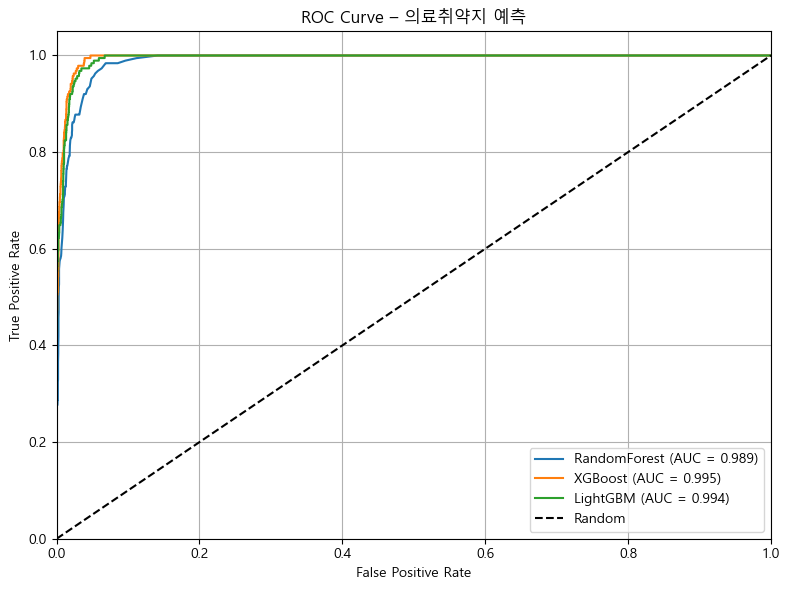

In [101]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Í≥µÌÜµ ÌÉÄÍ≤ü ÏÑ§Ï†ï
target = 'maybe_vulnerable'

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Ìè¨Ìï® Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©
X = df_model[features_with_cluster]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Î≥¥Ï†ï
scale_pos_weight = np.sum(y == 0) / np.sum(y == 1)

# Î™®Îç∏ Ï†ïÏùò
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight)
lgbm = LGBMClassifier(random_state=42, scale_pos_weight=scale_pos_weight)

# Î™®Îç∏ ÌïôÏäµ
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

# ROC curve Î∞è AUC Í≥ÑÏÇ∞
def get_roc(model, name):
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc, name

results = [
    get_roc(rf, "RandomForest"),
    get_roc(xgb, "XGBoost"),
    get_roc(lgbm, "LightGBM")
]

# ROC Curve Plot
plt.figure(figsize=(8, 6))
for fpr, tpr, roc_auc, label in results:
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve ‚Äì ÏùòÎ£åÏ∑®ÏïΩÏßÄ ÏòàÏ∏°")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

### 6-2 15km Í∏∞Ï§Ä ÎÇ¥ Î≥ëÏõê/ÏïΩÍµ≠Ïù¥ 1Í∞ú Ïù¥ÌïòÏù∏ ÏßÄÏó≠ ÏãùÎ≥Ñ

In [ ]:
# Î∂ÑÏÑù Î≤îÏúÑ Î∞è Í≤©Ïûê(15km) ÏÉùÏÑ±
all_lats = pd.concat([hos_df_f['wgs84Lat'], ph_df_f['wgs84Lat']])
all_lons = pd.concat([hos_df_f['wgs84Lon'], ph_df_f['wgs84Lon']])

min_lat = all_lats.min()
max_lat = all_lats.max()
min_lon = all_lons.min()
max_lon = all_lons.max()

lat_grid_size = 0.135  # ÏúÑÎèÑ 15km
lon_grid_size = 0.165  # Í≤ΩÎèÑ 15km (Ï§ëÏúÑÎèÑ Í∏∞Ï§Ä)

lat_bins = np.arange(min_lat, max_lat + lat_grid_size, lat_grid_size)
lon_bins = np.arange(min_lon, max_lon + lon_grid_size, lon_grid_size)

# Í∞Å Îç∞Ïù¥ÌÑ∞Ïóê Í≤©Ïûê Ïù∏Îç±Ïä§ Ìï†Îãπ
hos_df_f['lat_bin'] = np.digitize(hos_df_f['wgs84Lat'], lat_bins) - 1
hos_df_f['lon_bin'] = np.digitize(hos_df_f['wgs84Lon'], lon_bins) - 1
ph_df_f['lat_bin'] = np.digitize(ph_df_f['wgs84Lat'], lat_bins) - 1
ph_df_f['lon_bin'] = np.digitize(ph_df_f['wgs84Lon'], lon_bins) - 1

# Í≤©ÏûêÎ≥Ñ Î≥ëÏõê/ÏïΩÍµ≠ Ïàò ÏßëÍ≥Ñ
grid_hos = hos_df_f.groupby(['lat_bin', 'lon_bin']).size().rename('hospital_count')
grid_ph = ph_df_f.groupby(['lat_bin', 'lon_bin']).size().rename('pharmacy_count')

# Î≥ëÏõê 1Í∞ú Ïù¥Ìïò, ÏïΩÍµ≠ 1Í∞ú Ïù¥Ìïò Í≤©Ïûê Ï∂îÏ∂ú
vulnerable_hos = grid_hos[grid_hos <= 1]
vulnerable_ph = grid_ph[grid_ph <= 1]

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 10))
plt.scatter(hos_df_f['wgs84Lon'], hos_df_f['wgs84Lat'], c='blue', s=1, label='Î≥ëÏõê')      # ÏûëÏùÄ ÎßàÏª§
plt.scatter(ph_df_f['wgs84Lon'], ph_df_f['wgs84Lat'], c='green', s=1, label='ÏïΩÍµ≠')     # ÏûëÏùÄ ÎßàÏª§

# Î≥ëÏõê Ï∑®ÏïΩÏßÄ(Îπ®Í∞Ñ ÎÑ§Î™®)
for idx, row in vulnerable_hos.reset_index().iterrows():
    center_lat = lat_bins[int(row['lat_bin'])] + lat_grid_size / 2
    center_lon = lon_bins[int(row['lon_bin'])] + lon_grid_size / 2
    plt.scatter(center_lon, center_lat, c='red', s=80, marker='s', alpha=0.5, label='Î≥ëÏõêÏ∑®ÏïΩÏßÄ' if idx==0 else "")

# ÏïΩÍµ≠ Ï∑®ÏïΩÏßÄ(Î≥¥Îùº ÎÑ§Î™®)
for idx, row in vulnerable_ph.reset_index().iterrows():
    center_lat = lat_bins[int(row['lat_bin'])] + lat_grid_size / 2
    center_lon = lon_bins[int(row['lon_bin'])] + lon_grid_size / 2
    plt.scatter(center_lon, center_lat, c='purple', s=80, marker='s', alpha=0.5, label='ÏïΩÍµ≠Ï∑®ÏïΩÏßÄ' if idx==0 else "")

plt.xlabel('Í≤ΩÎèÑ')
plt.ylabel('ÏúÑÎèÑ')
plt.legend()
plt.title('15km Í≤©Ïûê ÎÇ¥ ÏùòÎ£åÏ∑®ÏïΩÏßÄ(Î≥ëÏõê‚â§1: Îπ®Í∞ï, ÏïΩÍµ≠‚â§1: Î≥¥Îùº)')
plt.show()

#### 6-2-1 Í∞Å Î≥ëÏõê Í∏∞Ï§Ä 15km Î∞òÍ≤Ω Ïõê (Î≥¥Î•ò)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# Î≥ëÏõê ÏúÑÏπò ÌëúÏãú (ÏûëÏùÄ ÌååÎûÄ Ï†ê)
ax.scatter(hos_df_f['wgs84Lon'], hos_df_f['wgs84Lat'], c='blue', s=1, label='Î≥ëÏõê')

# Í∞Å Î≥ëÏõê Ï¢åÌëúÏóê 15km(ÏúÑÎèÑ 0.135ÎèÑ) Ïõê Í∑∏Î¶¨Í∏∞
for idx, row in hos_df_f.iterrows():
    circle = plt.Circle(
        (row['wgs84Lon'], row['wgs84Lat']), 
        0.135,  # ÏúÑÎèÑ Í∏∞Ï§Ä 15km
        color='red', fill=False, alpha=0.3, linewidth=0.7
    )
    ax.add_patch(circle)

# Ï∂ï ÏÑ§Ï†ï Î∞è ÏãúÍ∞ÅÌôî
ax.set_xlabel('Í≤ΩÎèÑ')
ax.set_ylabel('ÏúÑÎèÑ')
ax.set_title('Í∞Å Î≥ëÏõê Í∏∞Ï§Ä 15km Ïõê')
ax.set_aspect('equal', adjustable='datalim')
plt.legend()
plt.show()

## 7. Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôî_Í∂åÌòÅÍ∑ú ÏΩîÎìú

### 1) ÏßÄÎèÑ ÏÉùÏÑ±

In [94]:
# Í∞Å Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨
hos_df = hos_df_hang.copy() # Î≥ëÏõê Îç∞Ïù¥ÌÑ∞
ph_df = ph_df_hang.copy() # ÏïΩÍµ≠ Îç∞Ïù¥ÌÑ∞
pl_df = pl_df_hang.copy() # Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞

# Î≥ëÏõê/ÏïΩÍµ≠/Î≥¥Í±¥ÏÜåÏóê 'type' Ïó¥ Ï∂îÍ∞Ä
hos_df['type'] = 'Î≥ëÏõê'
ph_df['type'] = 'ÏïΩÍµ≠'

# ÏÑ∏Î°ú Í≤∞Ìï©ÏùÑ ÏúÑÌï¥ ÌïÑÏöîÌïú Ïó¥Îßå ÏÑ†ÌÉù
common_cols = ['Jibun', 'Hang', 'Sido', 'Sigungu', 'Eupmywondong', 'wgs84Lat', 'wgs84Lon', 'type']

hos_sel = hos_df[common_cols]
ph_sel = ph_df[common_cols]

# ÏÑ∏Î°ú Î∞©Ìñ•ÏúºÎ°ú Í≤∞Ìï©
full_df = pd.concat([hos_sel, ph_sel], ignore_index=True)

In [95]:
# ÏïÑÏù¥ÏΩò ÏÑ§Ï†ï Ìï®Ïàò
def get_icon(category):

    # Î≥ëÏõêÍ≥º ÏïΩÍµ≠Ïóê Îî∞Îùº ÏïÑÏù¥ÏΩò ÏÉâÏÉÅÍ≥º Î™®ÏñëÏù¥ Îã§Î•¥Í≤å ÏÑ§Ï†ï
    color = "red" if category == "Î≥ëÏõê" else "green"
    icon = "medkit" if category == "Î≥ëÏõê" else "pills"
    return folium.Icon(color=color, icon=icon, prefix='fa')

# ÏßÄÎèÑ ÏÉùÏÑ± Ìï®Ïàò
def create_maps_by_region(df, grouped, output_dir='Ï∫°Ïä§ÌÜ§ Î≤ïÏ†ïÎèô ÏßÄÎèÑ'):
    os.makedirs(output_dir, exist_ok=True)

    # Í∞Å ÏßÄÏó≠ Îã®ÏúÑÎ°ú Í∑∏Î£πÌôîÎêú Îç∞Ïù¥ÌÑ∞Î•º ÏàúÌöå
    for region, group in grouped:

        # ÏúÑÎèÑÎÇò Í≤ΩÎèÑÍ∞Ä ÏóÜÎäî Ìñâ Ï†úÍ±∞
        valid_group = group.dropna(subset=["wgs84Lat", "wgs84Lon"])
        if valid_group.empty:
            continue

        # ÏßÄÎèÑ Ï¥àÍ∏∞Ìôî: Ìï¥Îãπ ÏßÄÏó≠Ïùò Ï§ëÏã¨ Ï¢åÌëúÎ°ú ÏÉùÏÑ±
        m = folium.Map(
            location=[valid_group["wgs84Lat"].mean(), valid_group["wgs84Lon"].mean()],
            zoom_start=13
        )

        # Î≥ëÏõêÍ≥º ÏïΩÍµ≠ Í∞ÅÍ∞ÅÏóê ÎåÄÌïú Ï≤òÎ¶¨
        for category in ['Î≥ëÏõê', 'ÏïΩÍµ≠']:
            sub = valid_group[valid_group["type"] == category]
            if sub.empty:
                continue

            # Î≥ëÏõê ÎòêÎäî ÏïΩÍµ≠Ïùò ÏúÑÎèÑ/Í≤ΩÎèÑ Î∞∞Ïó¥ Ï∂îÏ∂ú
            coords = sub[["wgs84Lat", "wgs84Lon"]].to_numpy()

            # DBSCAN ÌååÎùºÎØ∏ÌÑ∞: 1km Ïù¥ÎÇ¥Ïùò ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï∞æÍ∏∞
            epsilon = 1.0 / 6371.0088  # ÏßÄÍµ¨ Î∞òÏßÄÎ¶ÑÏùÑ Ïù¥Ïö©Ìïú ÎùºÎîîÏïà Í±∞Î¶¨

            # DBSCAN ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (ÌïòÎ≤ÑÏÇ¨Ïù∏ Í±∞Î¶¨ Í∏∞Ï§Ä)
            db = DBSCAN(eps=epsilon, min_samples=2, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
            
            sub = sub.copy()
            sub["cluster"] = db.labels_

            # Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÎåÄÌï¥ Ï≤òÎ¶¨
            for cluster_id in sub["cluster"].unique():
                cluster_points = sub[sub["cluster"] == cluster_id]
                cluster_coords = cluster_points[["wgs84Lat", "wgs84Lon"]].to_numpy()

                # ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï§ëÏã¨ Í≥ÑÏÇ∞
                center_lat = cluster_coords[:, 0].mean()
                center_lon = cluster_coords[:, 1].mean()
                max_dist = max(great_circle((center_lat, center_lon), (lat, lon)).meters for lat, lon in cluster_coords)
                radius = max_dist + 10000

                # ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï§ëÏã¨ÏúºÎ°ú Ïõê Í∑∏Î¶¨Í∏∞
                folium.Circle(
                    location=(center_lat, center_lon),
                    radius=radius,
                    color='red' if category == 'Î≥ëÏõê' else 'green',
                    weight=2,
                    fill=True,
                    fill_color='red' if category == 'Î≥ëÏõê' else 'green',
                    fill_opacity=0.1
                ).add_to(m)

                # Í∞Å Í∏∞Í¥Ä ÏúÑÏπòÏóê ÎßàÏª§ Ï∂îÍ∞Ä
                for _, row in cluster_points.iterrows():
                    popup_text = f"Ï£ºÏÜå: {row.get('Jibun', 'N/A')}"
                    folium.Marker(
                        location=(row["wgs84Lat"], row["wgs84Lon"]),
                        popup=folium.Popup(popup_text, max_width=300),
                        icon=get_icon(category)
                    ).add_to(m)

        # HTML ÌååÏùºÎ°ú ÏßÄÎèÑ Ï†ÄÏû•
        m.save(os.path.join(output_dir, f"{region}.html"))

    # Ï†ÑÏ≤¥ ÏßÄÎèÑ HTML ÌååÏùºÎì§ÏùÑ ZIPÏúºÎ°ú ÏïïÏ∂ï
    zip_path = output_dir + ".zip"
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for file in os.listdir(output_dir):
            zipf.write(os.path.join(output_dir, file), arcname=file)

In [ ]:
# SidoÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÏßÄÎèÑ ÏÉùÏÑ±
create_maps_by_region(full_df, full_df.groupby('Sido'))

### 2) Ïù∏Íµ¨Ïàò ÏãúÍ∞ÅÌôî

In [54]:
# Î≤ïÏ†ïÎèô ÏßÄÎèÑ Ìè¥Îçî Í≤ΩÎ°ú
root_folder = r"C:/Users/Admin/OneDrive/Ï∫°Ïä§ÌÜ§ ÏΩîÎìú/Ï∫°Ïä§ÌÜ§ Î≤ïÏ†ïÎèô ÏßÄÎèÑ"

# Ï†ÄÏû•Ìï† Ìè¥Îçî ÎßåÎì§Í∏∞
os.makedirs('C:/Users/Admin/OneDrive/Ï∫°Ïä§ÌÜ§/ÏãúÎèÑÎ≥Ñ ÏßÄÎèÑ', exist_ok=True)

# ÏãúÎèÑÎ≥Ñ Ìè¥Îçî Î™©Î°ù Í∞ÄÏ†∏Ïò§Í∏∞
sido_folders = [f.path for f in os.scandir(root_folder) if f.is_dir()]

In [55]:
# Ïù∏Íµ¨Ïàò ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú ÏÉâÏÉÅ ÏßÄÏ†ï
colormap_list = [
    cm.linear.Blues_09,   # ÌååÎûë Í≥ÑÏó¥
    cm.linear.Greens_09,  # Ï¥àÎ°ù Í≥ÑÏó¥
    cm.linear.Purples_09, # Î≥¥Îùº Í≥ÑÏó¥
    cm.linear.Reds_09,    # Îπ®Í∞ï Í≥ÑÏó¥
    cm.linear.Oranges_09  # Ï£ºÌô© Í≥ÑÏó¥
]

# ÏßÄÎèÑ ÏÉùÏÑ± Ìï®Ïàò
def create_map(geo_df, output_path):
    
    # ÏßÄÎèÑ Ï¥àÍ∏∞Ìôî - Ï†ÑÏ≤¥ Ï§ëÏã¨ Ï¢åÌëúÎ°ú ÏßÄÎèÑ ÏÉùÏÑ±
    center = geo_df.geometry.centroid.unary_union.centroid
    m = folium.Map(location=[center.y, center.x], zoom_start=7)

    # ÏãúÍµ∞Íµ¨Î≥ÑÎ°ú Î∞òÎ≥µÌïòÏó¨ GeoJson Ï∏µ ÏÉùÏÑ±
    for sigungu in geo_df['Sigungu'].unique():
        
        # Ìï¥Îãπ ÏãúÍµ∞Íµ¨Îßå ÌïÑÌÑ∞ÎßÅ
        subset = geo_df[geo_df['Sigungu'] == sigungu]

        # Ïù∏Íµ¨ÏàòÍ∞Ä 0Ïù∏ Í≤©Ïûê(ÏùçÎ©¥Îèô)Îäî Ï†úÏô∏
        subset = subset[subset['Í≥Ñ'] > 0]
        if subset.empty:
            continue  # Ìï¥Îãπ ÏãúÍµ∞Íµ¨Ïóê Ïù∏Íµ¨Í∞Ä ÏóÜÏúºÎ©¥ Í±¥ÎÑàÎúÄ

        # ÎûúÎç§ ÏÉâÏÉÅ Îßµ ÏÑ†ÌÉù ÌõÑ, Ìï¥Îãπ ÏãúÍµ∞Íµ¨Ïùò Ïù∏Íµ¨ min/maxÏóê ÎßûÏ∂∞ ÏÉâÏÉÅ Ïä§ÏºÄÏùº Ï°∞Ï†ï
        cmap = random.choice(colormap_list).scale(
            subset['Í≥Ñ'].min(), subset['Í≥Ñ'].max()
        )

        # Í∞Å ÏùçÎ©¥ÎèôÏùò Ïù∏Íµ¨ÏàòÏóê Îî∞Îùº ÏÉâÏÉÅÏùÑ ÏßÄÏ†ïÌïòÎäî Ïä§ÌÉÄÏùº Ìï®Ïàò Ï†ïÏùò
        def style_fn(feat, cmap=cmap):
            val = feat['properties']['Í≥Ñ']
            return {
                'fillColor': cmap(val),       # Ïù∏Íµ¨ÏàòÏóê Îî∞Î•∏ ÏÉâÏÉÅ
                'color': 'black',             # Ïô∏Í≥ΩÏÑ† ÏÉâ (ÏãúÍµ∞Íµ¨ Í≤ΩÍ≥ÑÏÑ†)
                'weight': 1,                  # Ïô∏Í≥ΩÏÑ† ÎëêÍªò
                'fillOpacity': 0.7            # Ï±ÑÏö∞Í∏∞ Ìà¨Î™ÖÎèÑ
            }

        # folium GeoJson Í∞ùÏ≤¥Î°ú ÏãúÍ∞ÅÌôî, Ìà¥ÌåÅ Î∞è ÌåùÏóÖ Ìè¨Ìï®
        folium.GeoJson(
            subset.to_json(),                # GeoDataFrameÏùÑ GeoJSON ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
            style_function=style_fn,        # Ïä§ÌÉÄÏùº ÏßÄÏ†ï
            tooltip=GeoJsonTooltip(         # ÎßàÏö∞Ïä§ Ïò§Î≤Ñ Ïãú Ìà¥ÌåÅ ÌëúÏãú
                fields=['EMD_NM','Í≥Ñ','Sigungu'],
                aliases=['Eupmywondong','count','Sigungu'],
                localize=True, sticky=True, labels=True, toLocaleString=True
            ),
            popup=GeoJsonPopup(             # ÌÅ¥Î¶≠ Ïãú ÌåùÏóÖ ÌëúÏãú
                fields=['EMD_NM','Í≥Ñ','ÏãúÍµ∞Íµ¨Î™Ö'],
                aliases=['Eupmywondong','count','Sigungu'],
                localize=True, labels=True, toLocaleString=True
            )
        ).add_to(m)
    
    # ÏßÄÎèÑ Ï†ÄÏû•
    m.save(output_path)

In [56]:
# ÏãúÎèÑÎ≥Ñ ÏßÄÎèÑ ÏÉùÏÑ± Î∞è Ï†ÄÏû•
merged_list = []  # ÏãúÎèÑÎ≥Ñ Î≥ëÌï© Îç∞Ïù¥ÌÑ∞Î•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏

# ÏãúÎèÑÎ≥Ñ Ìè¥Îçî Î∞òÎ≥µ
for sido_folder in sido_folders:
    folder_name = os.path.basename(sido_folder)        # Ìè¥ÎçîÎ™Ö Ï∂îÏ∂ú (Ïòà: 'LSMD_ADM_SECT_UMD_Í∞ïÏõê')
    folder_short = folder_name[-2:]                    # Ìè¥ÎçîÎ™Ö ÎÅù 2Í∏ÄÏûê (Ïòà: 'Í∞ïÏõê')
    sido_name = sido_mapping.get(folder_short)         # ÏãúÎèÑÎ™Ö Îß§Ìïë (Ïòà: 'Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ' ‚Üí 'Í∞ïÏõêÎèÑ')

    # Ìï¥Îãπ Ìè¥Îçî ÎÇ¥Ïùò shp ÌååÏùº Ï∞æÍ∏∞
    shp_files = glob.glob(os.path.join(sido_folder, '*.shp'))
    shp_file = shp_files[0]                            # Ï≤´ Î≤àÏß∏ shp ÌååÏùº ÏÇ¨Ïö©
    geo_df = gpd.read_file(shp_file, encoding='euc-kr')  # Í≥µÍ∞Ñ Ï†ïÎ≥¥ Î∂àÎü¨Ïò§Í∏∞

    # Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ìï¥Îãπ ÏãúÎèÑÎßå ÌïÑÌÑ∞ÎßÅ
    pl_sido_df = pl_df[pl_df['Sido'] == sido_name].copy()

    # ÏùçÎ©¥Îèô ÏΩîÎìú Ï∂îÏ∂ú (Î≤ïÏ†ïÎèôÏΩîÎìú Ïïû 8ÏûêÎ¶¨)
    pl_sido_df['ÏùçÎ©¥ÎèôÏΩîÎìú'] = pl_sido_df['Î≤ïÏ†ïÎèôÏΩîÎìú'].astype(str).str[:8]

    # ÏãúÍµ∞Íµ¨, ÏùçÎ©¥ÎèôÏΩîÎìú Í∏∞Ï§ÄÏúºÎ°ú Ïù∏Íµ¨Ïàò Ìï©ÏÇ∞
    pl_grouped = pl_sido_df.groupby(['ÏãúÍµ∞Íµ¨Î™Ö', 'ÏùçÎ©¥ÎèôÏΩîÎìú'])['Í≥Ñ'].sum().reset_index()

    # ÏãúÎèÑÎ™Ö Ïª¨Îüº Ï∂îÍ∞Ä
    pl_grouped['ÏãúÎèÑÎ™Ö'] = sido_name

    # Í≥µÍ∞ÑÏ†ïÎ≥¥(geo_df)ÏôÄ Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞(pl_grouped) Î≥ëÌï©
    merged = geo_df.merge(pl_grouped, left_on='EMD_CD', right_on='ÏùçÎ©¥ÎèôÏΩîÎìú')

    # Ï¢åÌëúÍ≥ÑÎ•º EPSG:4326 (WGS 84)Î°ú Î≥ÄÌôò (ÏßÄÎèÑ ÏãúÍ∞ÅÌôîÏö©)
    merged = merged.to_crs(epsg=4326)

    # Î≥ëÌï©Îêú Í≤∞Í≥ºÎ•º Î¶¨Ïä§Ìä∏Ïóê Ï†ÄÏû•
    merged_list.append(merged)

    # Ìï¥Îãπ ÏãúÎèÑÏùò Ïù∏Íµ¨ ÏßÄÎèÑÎ•º Ï†ÄÏû•
    create_map(merged, f'C:/Users/Admin/OneDrive/Ï∫°Ïä§ÌÜ§/ÏãúÎèÑÎ≥Ñ ÏßÄÎèÑ/{sido_name}_Ïù∏Íµ¨_ÏßÄÎèÑ.html')